### IMDB Movie Prediction

####  **Data description**
The dataset (movie-review-data.csv) contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

---
#### Problem Statement:
Build Model to predict what kind of movies are more successful.
Take imdb scores as response variable and focus on operating predictions by analyzing the rest of variables in the movie data.

----
- Author:- Sachin Nowal
- Date:-07/04/2021

### Contents
1. Importing libraries and loading data
2. Exploratory data analysis:looking what's in data :Statistics
    1. Basic observations, feature statistics
    2. Visual representations
3. Modelling
    1. Data cleaning (Missing value replacement)
    2. Feature Engineering(Creating new features)
    3. Feature selection (Correlation , Eliminating features)
    4. Machine learning algorithms with hyperparameter tuning
4. Conclusion

### (1.1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# setting up pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.2f}'.format


<ipython-input-1-719e70fc06b2>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### (1.2) Loading data

In [2]:
#Set theme
palette_theme='gist_rainbow'
#https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
input_folder_path=''
movie_data_filepath='movie_review_data.csv'

output_folder_path=r'C:/Users/91967/Desktop/machine_learning_projects/imdb_score_prediction_razorpay/output_files'
df_imdb_movie_data=pd.read_csv(movie_data_filepath)

#Basic formatting
textual_columns=[col for col in df_imdb_movie_data.columns if df_imdb_movie_data[col].dtype=='O']
for col in textual_columns:
    df_imdb_movie_data[col]=df_imdb_movie_data[col].astype(str).apply(lambda x: x.lower())
#Date format


In [3]:
df, df_unseen = train_test_split(df_imdb_movie_data, train_size=0.8, random_state=23)
#We will divide data into train and test randomly,
#And will find our analysis on training data
# We will write functions for data cleaning, feature engineering (feature creation ) and feature elimination/dropping
models_list=['xgboost','random_forest','DecisionTreeRegressor','LightGBM']

In [5]:
df.shape

(4034, 28)

In [10]:
df.append(df_unseen).shape

(5043, 28)

In [9]:
df.append(df_unseen).drop_duplicates().shape

(4998, 28)

In [11]:
5043-4998

45

### 2 Exploratory Data Analysis

### 2.1 Basic data observations

In [4]:
df=df.reset_index()
df.head(5)

index  color     director_name  num_critic_for_reviews  duration  \
0  1870   color  oliver stone     242.00                  129.00      
1  3550   color  denis villeneuve 226.00                  139.00      
2  612    color  ron howard       185.00                  111.00      
3  2171   color  alexander payne  549.00                  115.00      
4  785    color  harold becker    79.00                   111.00      

   director_facebook_likes  actor_3_facebook_likes               actor_2_name  \
0 0.00                     655.00                   scott glenn                 
1 777.00                   58.00                    mélissa désormeaux-poulin   
2 2000.00                  244.00                   clint howard                
3 729.00                   552.00                   nick krause                 
4 17.00                    652.00                   miko hughes                 

   actor_1_facebook_likes       gross                       genres  \
0 2000.00                 25517500.00  biography|drama|history       
1 131.00                  6857096.00   drama|mystery|war             
2 17000.00                48430355.00  comedy|drama                  
3 8000.00                 82624961.00  comedy|drama                  
4 13000.00                32940507.00  action|crime|drama|thriller   

       actor_1_name       movie_title  num_voted_users  \
0  toby jones        w.                40941             
1  lubna azabal      incendies         80429             
2  channing tatum    the dilemma       43709             
3  shailene woodley  the descendants   205284            
4  bruce willis      mercury rising    54314             

   cast_total_facebook_likes    actor_3_name  facenumber_in_poster  \
0  4264                       bruce mcgill   1.00                    
1  343                        ahmad massad   0.00                    
2  18510                      chelcie ross   2.00                    
3  9578                       beau bridges   0.00                    
4  16536                      carrie preston 1.00                    

                                                                                                  plot_keywords  \
0  bible|cabinet meeting|dog|drinking|family relationships                                                        
1  brother sister relationship|family relationships|middle east|mother son relationship|twin brother and sister   
2  best friend|friend|investigation|secret|two word title                                                         
3  boating accident|daughters|father daughter relationship|hospital|marriage                                      
4  autistic child|boy|child in danger|fbi|nsa                                                                     

                                        movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt1175491/?ref_=fn_tt_tt_1 320.00                  
1  http://www.imdb.com/title/tt1255953/?ref_=fn_tt_tt_1 156.00                  
2  http://www.imdb.com/title/tt1578275/?ref_=fn_tt_tt_1 141.00                  
3  http://www.imdb.com/title/tt1033575/?ref_=fn_tt_tt_1 439.00                  
4  http://www.imdb.com/title/tt0120749/?ref_=fn_tt_tt_1 127.00                  

  language country content_rating      budget  title_year  \
0  english  usa     pg-13         25100000.00 2008.00       
1  french   canada  r             6800000.00  2010.00       
2  english  usa     pg-13         70000000.00 2011.00       
3  english  usa     r             20000000.00 2011.00       
4  english  usa     r             60000000.00 1998.00       

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0 826.00                  6.40        2.35           0                     
1 66.00                   8.20        1.85           37000                 
2 1000.00                 5.30        2.35           0                     
3 727.00                  7.30        2.35       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      4034 non-null   int64  
 1   color                      4034 non-null   object 
 2   director_name              4034 non-null   object 
 3   num_critic_for_reviews     3992 non-null   float64
 4   duration                   4020 non-null   float64
 5   director_facebook_likes    3953 non-null   float64
 6   actor_3_facebook_likes     4013 non-null   float64
 7   actor_2_name               4034 non-null   object 
 8   actor_1_facebook_likes     4027 non-null   float64
 9   gross                      3322 non-null   float64
 10  genres                     4034 non-null   object 
 11  actor_1_name               4034 non-null   object 
 12  movie_title                4034 non-null   object 
 13  num_voted_users            4034 non-null   int64

##### Numeric feature statistics

In [6]:
df.describe()

index  num_critic_for_reviews  duration  director_facebook_likes  \
count 4034.00 3992.00                 4020.00   3953.00                    
mean  2531.14 138.93                  106.75    716.32                     
std   1455.35 121.11                  24.97     2907.08                    
min   0.00    1.00                    7.00      0.00                       
25%   1269.25 50.00                   93.00     7.00                       
50%   2524.50 109.00                  103.00    49.00                      
75%   3787.75 192.00                  118.00    189.00                     
max   5042.00 813.00                  511.00    23000.00                   

       actor_3_facebook_likes  actor_1_facebook_likes        gross  \
count 4013.00                 4027.00                 3322.00        
mean  639.19                  6558.73                 47955539.89    
std   1655.24                 15608.30                69279176.66    
min   0.00                    0.00                    703.00         
25%   132.00                  624.00                  5314944.75     
50%   375.00                  989.00                  25086272.00    
75%   636.00                  11000.00                60240612.75    
max   23000.00                640000.00               760505847.00   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count 4034.00          4034.00                    4024.00                 
mean  83226.95         9646.82                    1.35                    
std   139818.79        18640.45                   1.93                    
min   5.00             0.00                       0.00                    
25%   8472.50          1422.00                    0.00                    
50%   32869.00         3130.00                    1.00                    
75%   93698.00         13618.25                   2.00                    
max   1689764.00       656730.00                  31.00                   

       num_user_for_reviews        budget  title_year  actor_2_facebook_likes  \
count 4014.00               3640.00       3949.00     4021.00                   
mean  274.55                36987281.54   2002.57     1603.38                   
std   387.88                107257478.25  12.31       4060.86                   
min   1.00                  218.00        1916.00     0.00                      
25%   64.00                 6000000.00    1999.00     284.00                    
50%   156.00                19850000.00   2005.00     595.00                    
75%   327.00                42000000.00   2011.00     918.00                    
max   5060.00               4200000000.00 2016.00     137000.00                 

       imdb_score  aspect_ratio  movie_facebook_likes  
count 4034.00     3767.00       4034.00                
mean  6.43        2.20          7378.25                
std   1.13        1.27          19707.74               
min   1.90        1.20          0.00                   
25%   5.80        1.85          0.00                   
50%   6.60        2.35          166.00                 
75%   7.20        2.35          2000.00                
max   9.50        16.00         349000.00

##### Column wise null values percentage

In [7]:
df_percent_null=pd.DataFrame(100*df.isnull().sum()/len(df))
df_percent_null.reset_index(inplace=True)
df_percent_null.columns=['column_name','percent_null']
df_percent_null.sort_values('percent_null',ascending=False)

column_name  percent_null
9   gross                     17.65        
23  budget                    9.77         
27  aspect_ratio              6.62         
24  title_year                2.11         
5   director_facebook_likes   2.01         
3   num_critic_for_reviews    1.04         
6   actor_3_facebook_likes    0.52         
19  num_user_for_reviews      0.50         
4   duration                  0.35         
25  actor_2_facebook_likes    0.32         
16  facenumber_in_poster      0.25         
8   actor_1_facebook_likes    0.17         
18  movie_imdb_link           0.00         
26  imdb_score                0.00         
22  content_rating            0.00         
21  country                   0.00         
20  language                  0.00         
0   index                     0.00         
14  cast_total_facebook_likes 0.00         
17  plot_keywords             0.00         
15  actor_3_name              0.00         
1   color                     0.00         
13  num_voted_users           0.00         
12  movie_title               0.00         
11  actor_1_name              0.00         
10  genres                    0.00         
7   actor_2_name              0.00         
2   director_name             0.00         
28  movie_facebook_likes      0.00

### (2.2) Looking into specific columns

- 1. Correlation between features
- 2. Target column
- 3. String/object column
- 4. Numerical column

In [8]:
for col in df.columns:
    print(col,df[col].dtype)

index int64
color object
director_name object
num_critic_for_reviews float64
duration float64
director_facebook_likes float64
actor_3_facebook_likes float64
actor_2_name object
actor_1_facebook_likes float64
gross float64
genres object
actor_1_name object
movie_title object
num_voted_users int64
cast_total_facebook_likes int64
actor_3_name object
facenumber_in_poster float64
plot_keywords object
movie_imdb_link object
num_user_for_reviews float64
language object
country object
content_rating object
budget float64
title_year float64
actor_2_facebook_likes float64
imdb_score float64
aspect_ratio float64
movie_facebook_likes int64


In [9]:
#Columns with numeric datatype
numeric_columns=[col for col in df.columns if (df[col].dtype=='float64' or df[col].dtype=='int64') ]

#Columns with object datatype
obj_columns=[col for col in df.columns if df[col].dtype=='object']
#Columns with time datatype(Formatiing data for easy usage)
datetime_columns=['title_year']


print("Numeric columns")
print(numeric_columns)
print("String/object columns")
print(obj_columns)
print("Datetime columns")
print(datetime_columns)

Numeric columns
['index', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
String/object columns
['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']
Datetime columns
['title_year']


In [10]:
print('Target column: imdb_score')
print('Number of numeric columns',len([col for col in numeric_columns if col not in ['index','imdb_ratio']]))
print('Number of string/object columns',len(obj_columns))
print('Number of datetime columns',len(datetime_columns), 'title_year')

Target column: imdb_score
Number of numeric columns 16
Number of string/object columns 12
Number of datetime columns 1 title_year


### Correlation
We will also check correlatoin among final constructed features later

### Correlation between numeric variables

In [11]:
#'title_year' is taken here as numeric
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

In [12]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrmat.unstack().sort_values(ascending=False)
sorted_mat

movie_facebook_likes       movie_facebook_likes        1.00 
aspect_ratio               aspect_ratio                1.00 
num_critic_for_reviews     num_critic_for_reviews      1.00 
duration                   duration                    1.00 
director_facebook_likes    director_facebook_likes     1.00 
actor_3_facebook_likes     actor_3_facebook_likes      1.00 
actor_1_facebook_likes     actor_1_facebook_likes      1.00 
gross                      gross                       1.00 
num_voted_users            num_voted_users             1.00 
facenumber_in_poster       facenumber_in_poster        1.00 
num_user_for_reviews       num_user_for_reviews        1.00 
budget                     budget                      1.00 
title_year                 title_year                  1.00 
actor_2_facebook_likes     actor_2_facebook_likes      1.00 
imdb_score                 imdb_score                  1.00 
cast_total_facebook_likes  cast_total_facebook_likes   1.00 
index                   

In [13]:
df_corr=pd.DataFrame(sorted_mat).reset_index()
df_corr.columns=['feature_1','feature_2','correlation']
df_corr['abs_corr']=df_corr['correlation'].apply(lambda x:abs(x))
df_corr=df_corr[df_corr['abs_corr']!=1]
df_corr.sort_values('abs_corr',ascending=False)

feature_1                  feature_2  correlation  \
17   cast_total_facebook_likes  actor_1_facebook_likes    0.95           
18   actor_1_facebook_likes     cast_total_facebook_likes 0.95           
19   num_voted_users            num_user_for_reviews      0.80           
20   num_user_for_reviews       num_voted_users           0.80           
21   movie_facebook_likes       num_critic_for_reviews    0.68           
22   num_critic_for_reviews     movie_facebook_likes      0.68           
23   num_critic_for_reviews     num_voted_users           0.63           
24   num_voted_users            num_critic_for_reviews    0.63           
25   gross                      num_voted_users           0.63           
26   num_voted_users            gross                     0.63           
28   num_critic_for_reviews     num_user_for_reviews      0.61           
27   num_user_for_reviews       num_critic_for_reviews    0.61           
29   actor_2_facebook_likes     cast_total_facebook_likes 0.60           
30   cast_total_facebook_likes  actor_2_facebook_likes    0.60           
31   gross                      num_user_for_reviews      0.56           
32   num_user_for_reviews       gross                     0.56           
33   actor_2_facebook_likes     actor_3_facebook_likes    0.55           
34   actor_3_facebook_likes     actor_2_facebook_likes    0.55           
35   num_voted_users            movie_facebook_likes      0.55           
36   movie_facebook_likes       num_voted_users           0.55           
287  gross                      index                     -0.50          
288  index                      gross                     -0.50          
37   gross                      num_critic_for_reviews    0.49           
38   num_critic_for_reviews     gross                     0.49           
40   cast_total_facebook_likes  actor_3_facebook_likes    0.47           
39   actor_3_facebook_likes     cast_total_facebook_likes 0.47           
41   imdb_score                 num_voted_users           0.41           
42   num_voted_users            imdb_score                0.41           
286  index                      num_critic_for_reviews    -0.41          
285  num_critic_for_reviews     index                     -0.41          
44   movie_facebook_likes       num_user_for_reviews      0.40           
43   num_user_for_reviews       movie_facebook_likes      0.40           
46   gross                      movie_facebook_likes      0.38           
45   movie_facebook_likes       gross                     0.38           
47   actor_2_facebook_likes     actor_1_facebook_likes    0.37           
48   actor_1_facebook_likes     actor_2_facebook_likes    0.37           
284  index                      num_voted_users           -0.36          
283  num_voted_users            index                     -0.36          
282  num_user_for_reviews       index                     -0.35          
281  index                      num_user_for_reviews      -0.35          
50   num_user_for_reviews       duration                  0.33           
49   duration                   num_user_for_reviews      0.33           
51   director_facebook_likes    num_voted_users           0.32           
52   num_voted_users            director_facebook_likes   0.32           
53   actor_3_facebook_likes     gross                     0.32           
54   gross                      actor_3_facebook_likes    0.32           
55   duration                   num_voted_users           0.32           
56   num_voted_users            duration                  0.32           
57   imdb_score                 num_critic_for_reviews    0.32           
58   num_critic_for_reviews     imdb_score                0.32           
59   num_voted_users            actor_3_facebook_likes    0.31           
60   actor_3_facebook_likes     num_voted_users           0.31           
61   num_user_for_reviews       imdb_score                0.29           
62   imdb_score          

##### Insights
- **Highly correlated pairs**: 
    1. actor_1_facebook_likes and cast_total_facebook_likes	
    2. num_user_for_reviews and num_voted_users 
    3. num_critic_for_reviews and movie_facebook_likes
    4. num_critic_for_reviews	and num_voted_users
    5. gross and num_voted_users
    6. num_critic_for_reviews and num_user_for_reviews
    

- **Feature engineering step**: 
    1. Take cast_total_facebook_likes from {actor_1_facebook_likes and cast_total_facebook_likes} (low null values)
    2. Take num_voted_users from {num_user_for_reviews and num_voted_users} (low null values)
    3. Gross amount seems to be a very useful value for imdb_score intutively, so this should be used as it is.
    4. Both num_user_for_reviews and num_voted_users seems to determine different aspect related to the movie, so both could be used
---
- **For other combinations correlation value is not that significant.**


### Target column related response :: 'imdb_score'

In [14]:
df['imdb_score']

0      6.40
1      8.20
2      5.30
3      7.30
4      6.10
5      6.60
6      7.20
7      7.00
8      6.40
9      2.80
10     5.60
11     7.00
12     7.30
13     8.10
14     6.80
15     7.30
16     6.10
17     6.70
18     5.10
19     8.00
20     6.90
21     6.60
22     9.00
23     6.90
24     7.00
25     6.70
26     8.40
27     6.50
28     7.40
29     7.20
30     5.00
31     7.20
32     6.40
33     6.00
34     7.50
35     4.10
36     6.20
37     7.80
38     7.20
39     6.50
40     6.00
41     8.10
42     5.40
43     6.20
44     6.30
45     8.40
46     6.60
47     6.70
48     6.00
49     7.10
50     7.40
51     8.00
52     7.10
53     6.10
54     5.50
55     7.80
56     7.80
57     7.40
58     7.00
59     3.30
60     8.60
61     6.80
62     7.30
63     4.70
64     8.00
65     7.30
66     7.70
67     6.00
68     6.90
69     4.90
70     4.80
71     6.40
72     5.20
73     5.50
74     6.40
75     6.90
76     7.60
77     6.80
78     5.70
79     8.60
80     6.30
81     7.10
82     5.60
83  

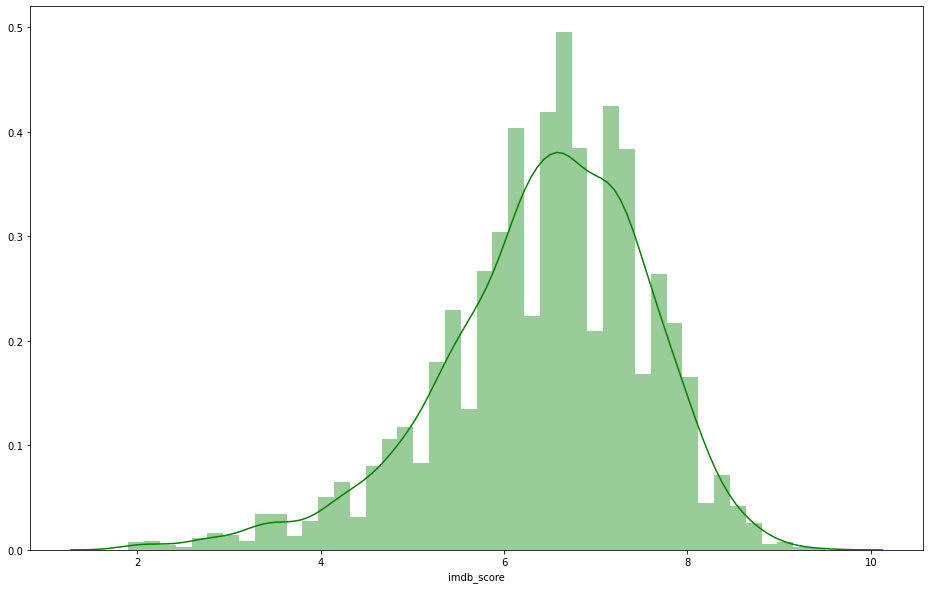

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['imdb_score'],ax=ax,color='green')

In [16]:
#Bucketing imdb_score 

In [17]:
df['imdb_score']

results, bin_edges = pd.qcut(df['imdb_score'],
                            q=[0, .1, .4, .6, .8, 1],
                            
                            retbins=True)

In [18]:
df['imdb_bucket']=pd.cut(df['imdb_score'], [0, 1,2,3,4,5,6,7,8,9,10])

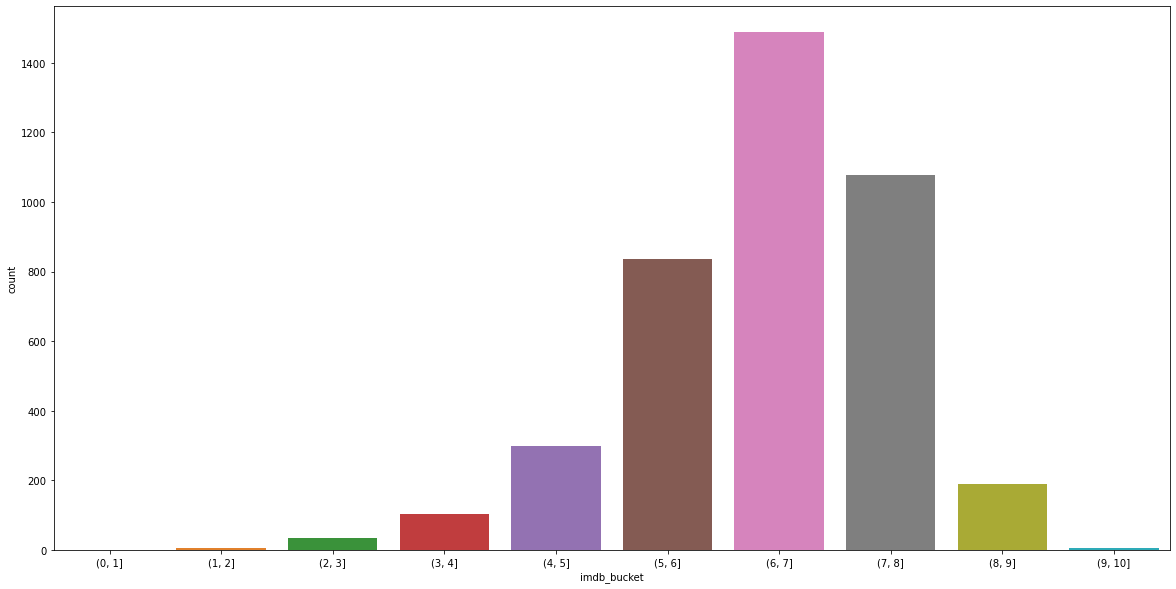

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df['imdb_bucket'],ax=ax)

In [20]:
df.drop('imdb_bucket',inplace=True,axis=1)

##### Insights
- The imdb score distribution is an approximate bell curve.
- To predict the imdb_score if we are using a classification approach, the scores have to be binned . 
- Also as the distribution is not uniform , we might need to use SMOTE/undersampling/ oversampling techniques.
----
- We also need to see how imdb score behaves with other features

### String /object columns related insights

#### 'movie_title', 'movie_imdb_link'

In [21]:
df['movie_title']

0       w.                                                                                     
1       incendies                                                                              
2       the dilemma                                                                            
3       the descendants                                                                        
4       mercury rising                                                                         
5       dune                                                                                   
6       anchorman: the legend of ron burgundy                                                  
7       public enemies                                                                         
8       leap year                                                                              
9       doogal                                                                                 
10      house on haunted hill           

In [22]:
df['movie_imdb_link']

0       http://www.imdb.com/title/tt1175491/?ref_=fn_tt_tt_1
1       http://www.imdb.com/title/tt1255953/?ref_=fn_tt_tt_1
2       http://www.imdb.com/title/tt1578275/?ref_=fn_tt_tt_1
3       http://www.imdb.com/title/tt1033575/?ref_=fn_tt_tt_1
4       http://www.imdb.com/title/tt0120749/?ref_=fn_tt_tt_1
5       http://www.imdb.com/title/tt0087182/?ref_=fn_tt_tt_1
6       http://www.imdb.com/title/tt0357413/?ref_=fn_tt_tt_1
7       http://www.imdb.com/title/tt1152836/?ref_=fn_tt_tt_1
8       http://www.imdb.com/title/tt1216492/?ref_=fn_tt_tt_1
9       http://www.imdb.com/title/tt0763304/?ref_=fn_tt_tt_1
10      http://www.imdb.com/title/tt0185371/?ref_=fn_tt_tt_1
11      http://www.imdb.com/title/tt0093200/?ref_=fn_tt_tt_1
12      http://www.imdb.com/title/tt0898367/?ref_=fn_tt_tt_1
13      http://www.imdb.com/title/tt0036868/?ref_=fn_tt_tt_1
14      http://www.imdb.com/title/tt0380389/?ref_=fn_tt_tt_1
15      http://www.imdb.com/title/tt0280653/?ref_=fn_tt_tt_1
16      http://www.imdb.

##### Insights
- Hard to find any intutive relation between 'movie_title' feature and other features
- May be more information could be scrapped from 'movie_imdb_link' feature
- **Data cleaning step**: None
- **Feature engineering step**: None, Both 'movie_title' and 'movie_imdb_link' should be dropped 

####  'color' 

In [23]:
df['color'].value_counts()

color               3855
 black and white    161 
nan                 18  
Name: color, dtype: int64

In [24]:
(df['color'].value_counts()/df['color'].shape[0])*100

color              95.56
 black and white   3.99 
nan                0.45 
Name: color, dtype: float64

In [25]:
#Relation with imdb score
#std, min, max could be calculated... but output shows no useful insight
df.groupby(['color']).agg(np.mean)

index  num_critic_for_reviews  duration  \
color                                                        
 black and white 3377.90 127.50                  109.70      
color            2492.52 139.86                  106.70      
nan              3228.00 23.40                   89.71       

                  director_facebook_likes  actor_3_facebook_likes  \
color                                                               
 black and white 1324.58                  327.39                    
color            693.61                   653.60                    
nan              74.75                    321.81                    

                  actor_1_facebook_likes       gross  num_voted_users  \
color                                                                   
 black and white 3466.89                 23892589.12 85897.68           
color            6647.96                 48747941.48 83436.52           
nan              15139.72                1346503.00  14454.94           

                  cast_total_facebook_likes  facenumber_in_poster  \
color                                                               
 black and white 5166.24                    1.47                    
color            9802.70                    1.35                    
nan              16338.28                   1.33                    

                  num_user_for_reviews      budget  title_year  \
color                                                            
 black and white 318.57                15377113.72 1983.01       
color            273.67                38017210.30 2003.35       
nan              41.69                 7385950.00  2011.43       

                  actor_2_facebook_likes  imdb_score  aspect_ratio  \
color                                                                
 black and white 839.58                  7.29        1.90            
color            1640.31                 6.40        2.21            
nan              488.88                  6.06        4.38            

                  movie_facebook_likes  
color                                   
 black and white 4001.27                
color            7538.89                
nan              3179.22

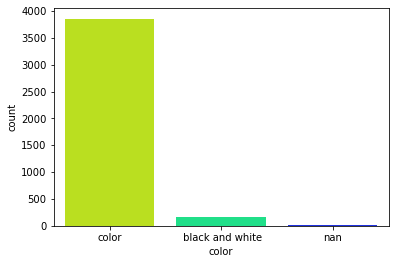

In [26]:
#Count/distribution plot of 'color' feature
sns.countplot(df['color'],palette=palette_theme)

##### Insights
- Color feature contains 95% color movies, its relation with year , money , total_cast_facebook_likes etc can be observed.
- **Data cleaning step**: With this high percentage of coloured movies , the nan/missing values can be filled with 'color'
- **Feature engineering step**: None, One hot encoding, but this won't be used because of heavy concentration on one side

#####  'director_name'

In [27]:
df['director_name'].value_counts().shape

(2088,)

In [28]:
df['director_name'].value_counts()

nan                                 81
steven spielberg                    22
woody allen                         18
clint eastwood                      16
steven soderbergh                   14
spike lee                           14
martin scorsese                     13
tim burton                          13
ridley scott                        13
renny harlin                        11
ron howard                          11
tony scott                          11
shawn levy                          11
peter jackson                       11
robert zemeckis                     10
joel schumacher                     10
kevin smith                         10
richard donner                      10
sam raimi                           10
barry levinson                      10
brian de palma                      10
oliver stone                        10
david fincher                       10
robert rodriguez                    10
john carpenter                      9 
tyler perry              

In [29]:
df.groupby(['director_name']).agg(np.mean)['imdb_score'].sort_values(ascending=False).shape

(2088,)

In [30]:
# Top directors based on avg. rating
#Relation with imdb score
#std, min, max could be calculated... but output shows no useful insight
df_top_dir=df.groupby(['director_name']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_top_dir.columns=['mean_rating','frequency']
df_top_dir

mean_rating  frequency
director_name                                           
nan                              7.48         81.00     
steven spielberg                 7.37         22.00     
woody allen                      7.07         18.00     
clint eastwood                   7.25         16.00     
spike lee                        6.55         14.00     
steven soderbergh                6.73         14.00     
martin scorsese                  7.87         13.00     
tim burton                       6.91         13.00     
ridley scott                     7.13         13.00     
ron howard                       6.81         11.00     
shawn levy                       6.09         11.00     
renny harlin                     5.83         11.00     
peter jackson                    7.56         11.00     
tony scott                       6.79         11.00     
kevin smith                      6.78         10.00     
brian de palma                   6.48         10.00     
sam raimi                        7.04         10.00     
oliver stone                     6.67         10.00     
david fincher                    7.75         10.00     
robert zemeckis                  7.03         10.00     
barry levinson                   6.35         10.00     
robert rodriguez                 5.84         10.00     
joel schumacher                  6.39         10.00     
richard donner                   6.96         10.00     
richard linklater                7.20         9.00      
stephen frears                   7.00         9.00      
john carpenter                   6.81         9.00      
tyler perry                      4.90         9.00      
quentin tarantino                8.20         8.00      
michael bay                      6.70         8.00      
wes craven                       6.05         8.00      
neil jordan                      6.76         8.00      
alfred hitchcock                 7.35         8.00      
guy ritchie                      7.26         8.00      
david gordon green               6.58         8.00      
rob reiner                       7.15         8.00      
christopher nolan                8.42         8.00      
francis ford coppola             7.83         8.00      
edward zwick                     7.24         7.00      
chris columbus                   6.34         7.00      
yimou zhang                      7.29         7.00      
rob cohen                        5.83         7.00      
george a. romero                 6.93         7.00      
joe dante                        6.30         7.00      
simon west                       5.91         7.00      
paul w.s. anderson               6.10         7.00      
david ayer                       6.77         7.00      
stephen herek                    6.01         7.00      
frank oz                         6.57         7.00      
m. night shyamalan               6.04         7.00      
john mctiernan                   6.29         7.00      
jaume collet-serra               6.64         7.00      
bobby farrelly                   6.20         7.00      
james mangold                    7.04         7.00      
harold ramis                     6.79         7.00      
jay roach                        6.41         7.00      
danny boyle                      7.47         7.00      
brett ratner                     6.46         7.00      
phillip noyce                    6.81         7.00      
peter segal                      6.19         7.00      
jon turteltaub                   6.57         6.00      
paul verhoeven                   6.72         6.00      
frank coraci                     5.78         6.00      
bryan singer                     7.20         6.00      
john singleton                   6.23         6.00      
alejandro g. iñárritu            7.78         6.00      
adam shankman                    6.07         6.00      
cameron crowe                    6.58         6.00      
ang lee                          7.27       

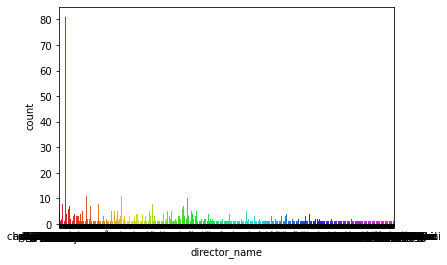

In [31]:
#Count/distribution plot of 'director_name' feature
sns.countplot(df['director_name'],palette=palette_theme)
#Not a useful plot

##### Insights
- Color feature contains 95% color movies, its relation with year , money , total_cast_facebook_likes etc can be observed.
- Color feature contains 95% color movies, its relation with year , money , total_cast_facebook_likes etc can be observed.

- **Data cleaning step**: Empty string (but feature used could be top rated director)
- **Feature engineering step**: It is obsrved that top directors have good imdb rating, so top director could be a feature or  rated  directors could be a feature

#### "genre"

In [32]:
df['genres'].apply(lambda x:x.split('|'))

0       [biography, drama, history]                                              
1       [drama, mystery, war]                                                    
2       [comedy, drama]                                                          
3       [comedy, drama]                                                          
4       [action, crime, drama, thriller]                                         
5       [action, adventure, sci-fi]                                              
6       [comedy]                                                                 
7       [biography, crime, drama, history, romance]                              
8       [comedy, romance]                                                        
9       [adventure, animation, comedy, family, fantasy]                          
10      [horror, mystery, thriller]                                              
11      [comedy]                                                                 
12      [adventu

In [33]:
#Unique genres
unique_genres=set()
all_genre_list=[]
for row in df['genres'].apply(lambda x:x.split('|')):
    for genre in row:
        unique_genres.add(genre)
        all_genre_list.append(genre)
#To take care of new genre adding other
unique_genres.add('other')
all_genre_list=pd.Series(all_genre_list)


print('unique genres')
print(unique_genres)

unique genres
{'comedy', 'news', 'fantasy', 'crime', 'mystery', 'war', 'reality-tv', 'romance', 'short', 'thriller', 'documentary', 'animation', 'horror', 'musical', 'family', 'action', 'music', 'film-noir', 'adventure', 'sci-fi', 'other', 'sport', 'history', 'biography', 'drama', 'game-show', 'western'}


In [34]:
all_genre_list.value_counts()

drama          2066
comedy         1532
thriller       1105
action         912 
romance        894 
adventure      752 
crime          714 
fantasy        485 
sci-fi         479 
horror         456 
family         447 
mystery        406 
biography      226 
animation      208 
war            170 
music          168 
history        162 
sport          145 
musical        111 
documentary    97  
western        73  
film-noir      5   
short          5   
reality-tv     2   
news           2   
game-show      1   
dtype: int64

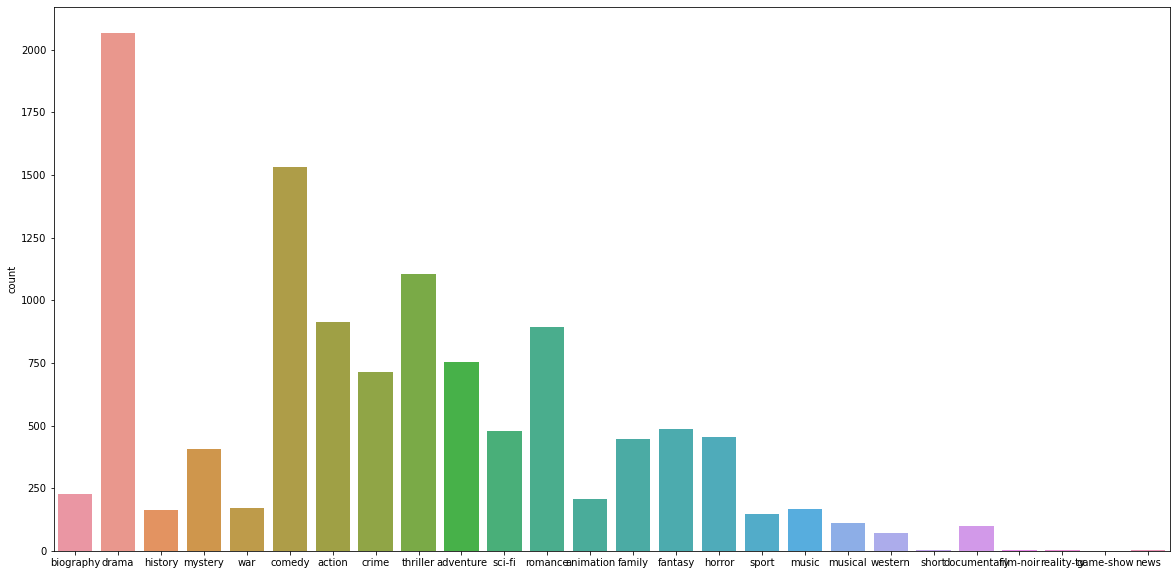

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(all_genre_list,ax=ax)

In [36]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [37]:
df_genre=pd.DataFrame(np.zeros((df.shape[0],len(unique_genres)),dtype=type(1)),columns=unique_genres)
df_genre['genres']=df['genres']
df_genre['imdb_score']=df['imdb_score']
def genre_func(row,col_name):
    if col_name in row['genres'].split('|'):
        return 1
    else:
        return 0
for col_name in unique_genres:
#     print(col_name)
    df_genre[col_name]=df_genre.apply(lambda x:genre_func(x,col_name),axis=1)
df_genre.head(10)

comedy  news  fantasy  crime  mystery  war  reality-tv  romance  short  \
0  0       0     0        0      0        0    0           0        0       
1  0       0     0        0      1        1    0           0        0       
2  1       0     0        0      0        0    0           0        0       
3  1       0     0        0      0        0    0           0        0       
4  0       0     0        1      0        0    0           0        0       
5  0       0     0        0      0        0    0           0        0       
6  1       0     0        0      0        0    0           0        0       
7  0       0     0        1      0        0    0           1        0       
8  1       0     0        0      0        0    0           1        0       
9  1       0     1        0      0        0    0           0        0       

   thriller  documentary  animation  horror  musical  family  action  music  \
0  0         0            0          0       0        0       0       0       
1  0         0            0          0       0        0       0       0       
2  0         0            0          0       0        0       0       0       
3  0         0            0          0       0        0       0       0       
4  1         0            0          0       0        0       1       0       
5  0         0            0          0       0        0       1       0       
6  0         0            0          0       0        0       0       0       
7  0         0            0          0       0        0       0       0       
8  0         0            0          0       0        0       0       0       
9  0         0            1          0       0        1       0       0       

   film-noir  adventure  sci-fi  other  sport  history  biography  drama  \
0  0          0          0       0      0      1        1          1       
1  0          0          0       0      0      0        0          1       
2  0          0          0       0      0      0        0          1       
3  0          0          0       0      0      0        0          1       
4  0          0          0       0      0      0        0          1       
5  0          1          1       0      0      0        0          0       
6  0          0          0       0      0      0        0          0       
7  0          0          0       0      0      1        1          1       
8  0          0          0       0      0      0        0          0       
9  0          1          0       0      0      0        0          0       

   game-show  western                                     genres  imdb_score  
0  0          0        biography|drama|history                   6.40         
1  0          0        drama|mystery|war                         8.20         
2  0          0        comedy|drama                              5.30         
3  0          0        comedy|drama                              7.30         
4  0          0        action|crime|drama|thriller               6.10         
5  0          0        action|adventure|sci-fi                   6.60         
6  0          0        comedy                                    7.20         
7  0          0        biography|crime|drama|history|romance     7.00         
8  0          0        comedy|romance                            6.40         
9  0          0        adventure|animation|comedy|family|fantasy 2.80

In [38]:
#Groupby col_name and imdb_score

##### Insights
- Most popular genres: Drama, comedy, thriller, action and romance

- **Data cleaning step**: Entity embedding (auto-encoder could be used here)
- **Feature engineering step**: Feature columns can be constructed for these genres

#### 'plot_keywords'

In [39]:
df['plot_keywords']
unique_keywords=set()
for row in df['plot_keywords'].apply(lambda x:x.split('|')):
    for keyword in row:
        unique_keywords.add(keyword)
print(len(unique_keywords))

7098


##### Insights
- Using plot_keywords doesn't seem intutive for imdb_score prediction, as there are many unique keywords.
- Some other approach may be taken to include this in modelling, but but currently here it's not being used

- **Data cleaning step**: None
- **Feature engineering step**: Drop this feature while modelling

#### 'language'

In [40]:
df['language'].value_counts()

english       3771
french        52  
spanish       31  
hindi         22  
mandarin      20  
japanese      17  
german        15  
nan           11  
russian       9   
cantonese     8   
italian       8   
portuguese    6   
swedish       5   
hebrew        5   
korean        4   
dutch         4   
arabic        4   
persian       3   
polish        3   
dari          2   
norwegian     2   
thai          2   
chinese       2   
icelandic     2   
aboriginal    2   
none          2   
danish        2   
indonesian    2   
slovenian     1   
greek         1   
czech         1   
panjabi       1   
bosnian       1   
kannada       1   
kazakh        1   
aramaic       1   
maya          1   
urdu          1   
dzongkha      1   
mongolian     1   
filipino      1   
zulu          1   
romanian      1   
swahili       1   
hungarian     1   
telugu        1   
Name: language, dtype: int64

In [41]:
df_language=df.groupby(['language']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_language.columns=['mean_imdb_rating','frequency']
df_language['percentage']=df_language['frequency'].apply(lambda x: x/df.shape[0])
df_language.reset_index(inplace=True)
df_language

language  mean_imdb_rating  frequency  percentage
0   english    6.39              3771.00    0.93       
1   french     7.09              52.00      0.01       
2   spanish    6.95              31.00      0.01       
3   hindi      6.77              22.00      0.01       
4   mandarin   6.93              20.00      0.00       
5   japanese   7.35              17.00      0.00       
6   german     7.29              15.00      0.00       
7   nan        6.95              11.00      0.00       
8   russian    6.06              9.00       0.00       
9   italian    6.88              8.00       0.00       
10  cantonese  6.90              8.00       0.00       
11  portuguese 7.43              6.00       0.00       
12  hebrew     7.58              5.00       0.00       
13  swedish    7.44              5.00       0.00       
14  dutch      7.42              4.00       0.00       
15  korean     7.47              4.00       0.00       
16  arabic     7.38              4.00       0.00       
17  polish     7.97              3.00       0.00       
18  persian    7.30              3.00       0.00       
19  icelandic  7.55              2.00       0.00       
20  indonesian 7.90              2.00       0.00       
21  dari       7.50              2.00       0.00       
22  danish     8.10              2.00       0.00       
23  chinese    5.65              2.00       0.00       
24  thai       6.65              2.00       0.00       
25  none       7.95              2.00       0.00       
26  norwegian  7.30              2.00       0.00       
27  aboriginal 6.95              2.00       0.00       
28  slovenian  6.40              1.00       0.00       
29  swahili    7.40              1.00       0.00       
30  telugu     8.40              1.00       0.00       
31  romanian   6.50              1.00       0.00       
32  urdu       7.00              1.00       0.00       
33  kannada    7.10              1.00       0.00       
34  panjabi    6.60              1.00       0.00       
35  mongolian  7.30              1.00       0.00       
36  maya       7.80              1.00       0.00       
37  kazakh     6.00              1.00       0.00       
38  hungarian  7.10              1.00       0.00       
39  greek      7.30              1.00       0.00       
40  filipino   6.70              1.00       0.00       
41  dzongkha   7.50              1.00       0.00       
42  czech      7.40              1.00       0.00       
43  bosnian    4.30              1.00       0.00       
44  aramaic    7.10              1.00       0.00       
45  zulu       6.90              1.00       0.00

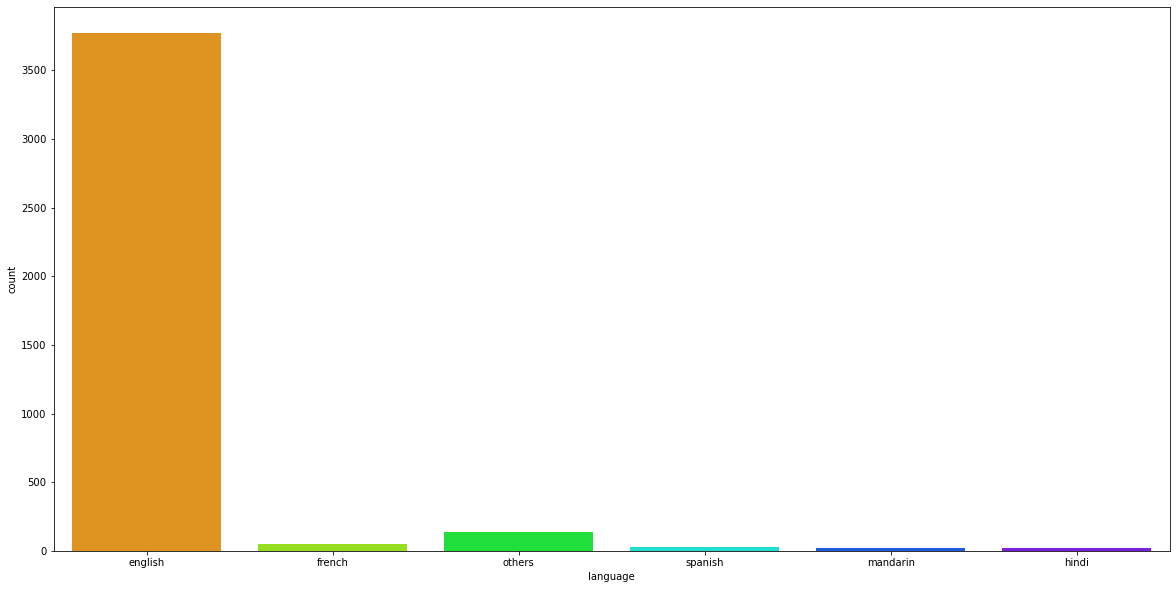

In [42]:
#Count/distribution plot of 'country' feature
fig, ax = plt.subplots(figsize=(20,10))
top_5_language=list(df['language'].value_counts().nlargest(5).sort_index().index)
sns.countplot(df['language'].apply(lambda x:x if x in top_5_language else 'others'),palette=palette_theme)

##### Insights
- It can be noticed that most of the movies in this list  is from USA. 

- **Data cleaning step**: nan values can be filled with usa , 
- **Feature engineering step**:Language category can have english or non_english (1/0)

#### 'country'

In [43]:
df['country'].value_counts()/df['country'].shape[0]*100

usa                    75.86
uk                     8.70 
france                 2.78 
canada                 2.53 
germany                2.01 
australia              1.02 
india                  0.67 
spain                  0.62 
china                  0.59 
japan                  0.50 
italy                  0.47 
new zealand            0.35 
hong kong              0.35 
mexico                 0.35 
ireland                0.30 
south korea            0.25 
russia                 0.22 
brazil                 0.17 
denmark                0.17 
south africa           0.15 
sweden                 0.15 
norway                 0.12 
nan                    0.12 
israel                 0.10 
netherlands            0.10 
poland                 0.07 
belgium                0.07 
iceland                0.07 
czech republic         0.07 
argentina              0.07 
thailand               0.07 
greece                 0.05 
romania                0.05 
hungary                0.05 
iran          

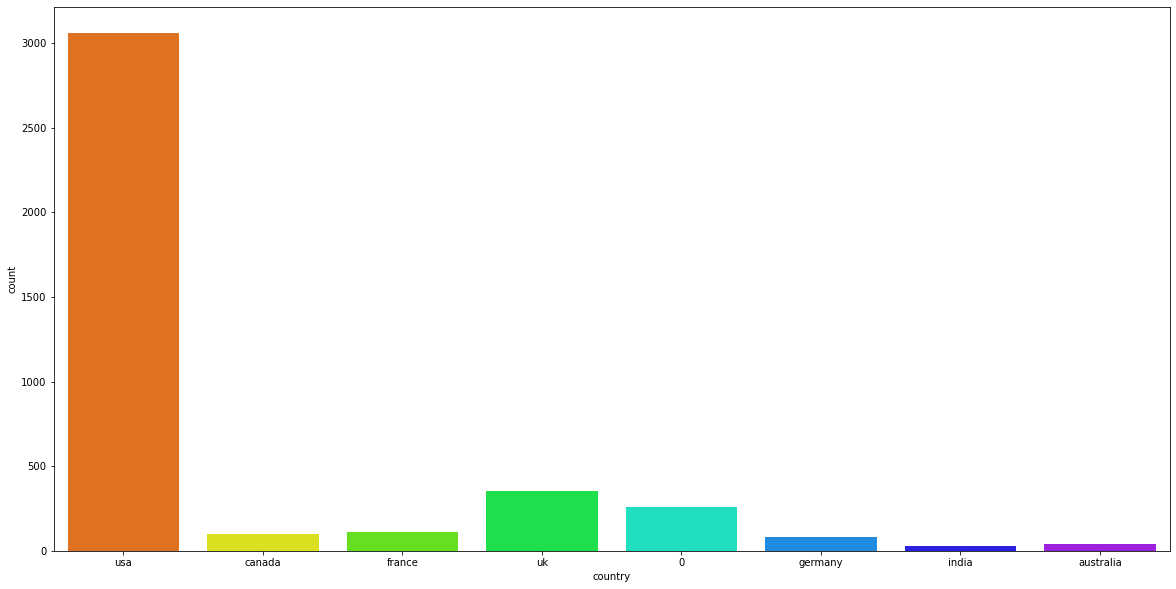

In [44]:
#Count/distribution plot of 'country' feature
fig, ax = plt.subplots(figsize=(20,10))
top_7_country=list(df['country'].value_counts().nlargest(7).sort_index().index)
sns.countplot(df['country'].apply(lambda x:x if x in top_7_country else 0),palette=palette_theme)

In [45]:
df_country=df.groupby(['country']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_country.columns=['mean_imdb_rating','frequency']
df_country['percentage']=df_country['frequency'].apply(lambda x: x/df.shape[0])
df_country.reset_index(inplace=True)
df_country

country  mean_imdb_rating  frequency  percentage
0   usa                  6.35              3060.00    0.76       
1   uk                   6.83              351.00     0.09       
2   france               6.68              112.00     0.03       
3   canada               6.18              102.00     0.03       
4   germany              6.36              81.00      0.02       
5   australia            6.58              41.00      0.01       
6   india                6.65              27.00      0.01       
7   spain                6.82              25.00      0.01       
8   china                6.75              24.00      0.01       
9   japan                7.08              20.00      0.00       
10  italy                6.71              19.00      0.00       
11  mexico               6.87              14.00      0.00       
12  hong kong            6.62              14.00      0.00       
13  new zealand          7.34              14.00      0.00       
14  ireland              6.78              12.00      0.00       
15  south korea          5.84              10.00      0.00       
16  russia               5.71              9.00       0.00       
17  denmark              7.21              7.00       0.00       
18  brazil               7.16              7.00       0.00       
19  south africa         6.53              6.00       0.00       
20  sweden               7.52              6.00       0.00       
21  nan                  6.80              5.00       0.00       
22  norway               6.36              5.00       0.00       
23  netherlands          7.42              4.00       0.00       
24  israel               7.52              4.00       0.00       
25  iceland              7.33              3.00       0.00       
26  argentina            7.77              3.00       0.00       
27  czech republic       6.97              3.00       0.00       
28  thailand             6.03              3.00       0.00       
29  belgium              5.97              3.00       0.00       
30  poland               7.97              3.00       0.00       
31  romania              5.70              2.00       0.00       
32  hungary              6.45              2.00       0.00       
33  iran                 8.00              2.00       0.00       
34  greece               7.00              2.00       0.00       
35  soviet union         8.10              1.00       0.00       
36  philippines          6.30              1.00       0.00       
37  slovenia             6.40              1.00       0.00       
38  switzerland          5.70              1.00       0.00       
39  slovakia             6.00              1.00       0.00       
40  taiwan               7.90              1.00       0.00       
41  turkey               6.00              1.00       0.00       
42  united arab emirates 8.20              1.00       0.00       
43  afghanistan          7.40              1.00       0.00       
44  kyrgyzstan           8.70              1.00       0.00       
45  peru                 5.40              1.00       0.00       
46  finland              7.20              1.00       0.00       
47  aruba                4.80              1.00       0.00       
48  bahamas              4.40              1.00       0.00       
49  bulgaria             6.10              1.00       0.00       
50  cameroon             7.50              1.00       0.00       
51  chile                6.90              1.00       0.00       
52  dominican republic   6.90              1.00       0.00       
53  egypt                8.10              1.00       0.00       
54  georgia              5.60              1.00       0.00       
55  panama               7.20              1.00       0.00       
56  indonesia            7.60              1.00       0.00       
57  kenya                7.40              1.00       0.00       
58  libya                8.40              1.00       0.00       
59  new line             4.40              1.00       0.0

##### Insights
- It can be noticed that there is no variation/trend in 'imdb_score' on the basis of country

- **Data cleaning step**: nan values can be filled with usa , 
- **Feature engineering step**:Take top 3 categories

#### 'content_rating'

In [46]:
df_cr=df.groupby('content_rating').agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_cr.columns=['mean_imdb_rating','frequency']
df_cr.reset_index(inplace=True)
df_cr

content_rating  mean_imdb_rating  frequency
0   r             6.51              1692.00   
1   pg-13         6.24              1153.00   
2   pg            6.29              569.00    
3   nan           6.39              246.00    
4   g             6.57              96.00     
5   not rated     6.62              92.00     
6   unrated       6.91              50.00     
7   approved      7.41              42.00     
8   tv-14         7.17              27.00     
9   tv-ma         8.16              16.00     
10  x             6.56              11.00     
11  tv-g          7.01              9.00      
12  tv-pg         7.21              9.00      
13  passed        7.14              5.00      
14  nc-17         6.34              5.00      
15  m             6.84              5.00      
16  gp            7.06              5.00      
17  tv-y          7.40              1.00      
18  tv-y7         7.20              1.00

In [47]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x="content_rating", y="mean_imdb_rating", ax=ax, data=df_cr[:15],palette=palette_theme)

##### Insights
- It can be noticed that there is no variation/trend in 'imdb_score' on the basis of content_rating

- **Data cleaning step**: Unrated , Not rated and nan can be clubbed
- **Feature engineering step**:Take top 3 categories

#### Actor names: 'actor_1_name','actor_2_name','actor_3_name'

In [48]:
df[['movie_title','actor_1_name','actor_2_name','actor_3_name']]

movie_title  \
0     w.                                                                                        
1     incendies                                                                                 
2     the dilemma                                                                               
3     the descendants                                                                           
4     mercury rising                                                                            
5     dune                                                                                      
6     anchorman: the legend of ron burgundy                                                     
7     public enemies                                                                            
8     leap year                                                                                 
9     doogal                                                                                    
10    house on haunted hill                                                                     
11    hollywood shuffle                                                                         
12    the road                                                                                  
13    the best years of our lives                                                               
14    goal! the dream begins                                                                    
15    amen.                                                                                     
16    chasing liberty                                                                           
17    shattered                                                                                 
18    jennifer's body                                                                           
19    cinderella man                                                                            
20    the majestic                                                                              
21    kick-ass 2                                                                                
22    the dark knight                                                                           
23    stripes                                                                                   
24    jack reacher                                                                              
25    silent movie                                                                              
26    american beauty                                                                           
27    the poker house                                                                           
28    zero dark thirty                                                                          
29    the apostle                                                                               
30    alvin and the chipmunks: the road chip                                                    
31    sands of iwo jima                                                                         
32    blood work                                                                                
33    teenage mutant ninja turtles ii: the secret of the ooze                                   
34    2046                                                                                      
35    a warrior's tail                                                                          
36    stigmata                                                                                  
37    the color purple                                                                          
38    live free or die hard                                                                     
39    alice in wonderland                                                                       
40    for colored girls                                                                         
41    th

In [49]:
df['actor_1_name'].value_counts()

robert de niro                43
johnny depp                   28
nicolas cage                  28
j.k. simmons                  27
bruce willis                  27
liam neeson                   24
harrison ford                 23
morgan freeman                23
bill murray                   22
jason statham                 22
robin williams                21
steve buscemi                 21
tom cruise                    20
denzel washington             20
scarlett johansson            20
christian bale                20
keanu reeves                  20
tom hanks                     19
anthony hopkins               19
robert downey jr.             19
kevin spacey                  18
philip seymour hoffman        17
jim broadbent                 17
brad pitt                     17
gerard butler                 17
naomi watts                   16
will ferrell                  16
leonardo dicaprio             16
dwayne johnson                15
paul walker                   15
sylvester 

### Numerical features


#### 'aspect_ratio'

In [50]:
df['aspect_ratio'].value_counts()

2.35     1886
1.85     1519
1.78     100 
1.37     78  
1.66     52  
1.33     52  
16.00    30  
2.39     12  
2.20     10  
4.00     6   
2.00     5   
2.40     3   
1.75     3   
2.76     2   
2.55     2   
1.50     2   
2.24     1   
1.44     1   
1.89     1   
1.77     1   
1.20     1   
Name: aspect_ratio, dtype: int64

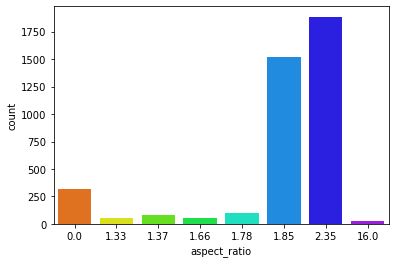

In [51]:
#Count/distribution plot of 'director_name' feature
top_7_ar=list(df['aspect_ratio'].value_counts().nlargest(7).sort_index().index)
sns.countplot(df['aspect_ratio'].apply(lambda x:x if x in top_7_ar else 0),palette=palette_theme)

In [52]:
df_aspect_ratio=df.groupby(['aspect_ratio']).agg([np.mean,lambda x: len(x)])['imdb_score'].sort_values('<lambda_0>',ascending=False)
df_aspect_ratio.columns=['mean_imdb_rating','frequency']
df_aspect_ratio.reset_index(inplace=True)
df_aspect_ratio

aspect_ratio  mean_imdb_rating  frequency
0  2.35          6.45              1886.00   
1  1.85          6.38              1519.00   
2  1.78          6.19              100.00    
3  1.37          7.13              78.00     
4  1.66          7.21              52.00     
5  1.33          7.19              52.00     
6  16.00         7.08              30.00     
7  2.39          6.75              12.00     
8  2.20          7.42              10.00     
9  4.00          7.68              6.00      
10 2.00          6.84              5.00      
11 2.40          7.23              3.00      
12 1.75          7.90              3.00      
13 1.50          7.15              2.00      
14 2.76          7.75              2.00      
15 2.55          6.55              2.00      
16 1.20          7.80              1.00      
17 2.24          7.60              1.00      
18 1.77          6.30              1.00      
19 1.44          7.50              1.00      
20 1.89          6.30              1.00

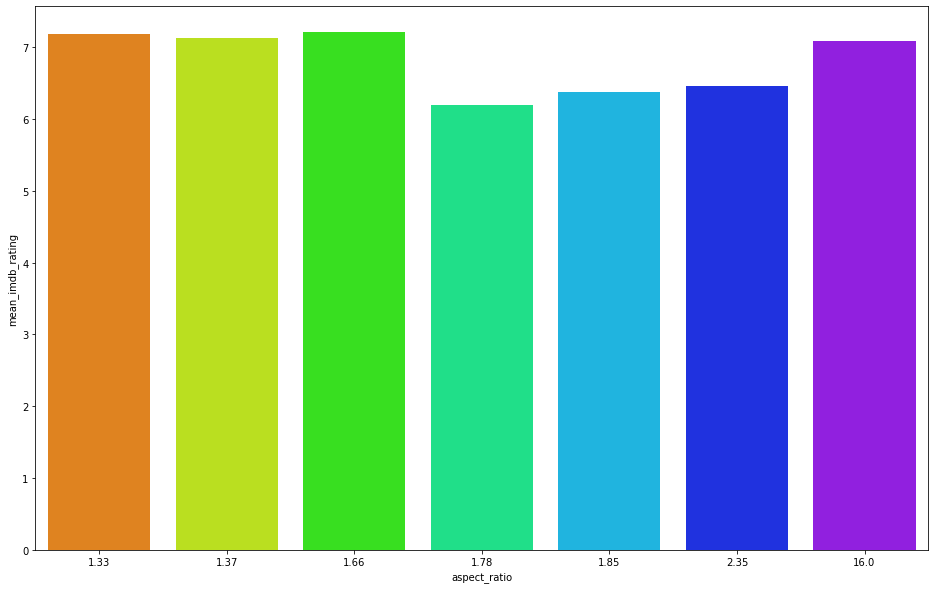

In [53]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x="aspect_ratio", y="mean_imdb_rating", ax=ax, data=df_aspect_ratio[:7],palette=palette_theme)

##### Insights
- Most of the movies have aspect ratio of 1.85 or 2.35
- It can be noticed that there is no variation/trend in 'imdb_score' on the basis of aspect_ratio

- **Data cleaning step**: There is null value,type=numeric
- **Feature engineering step**: Drop this feature as this seems non-intutive

##### 'duration'

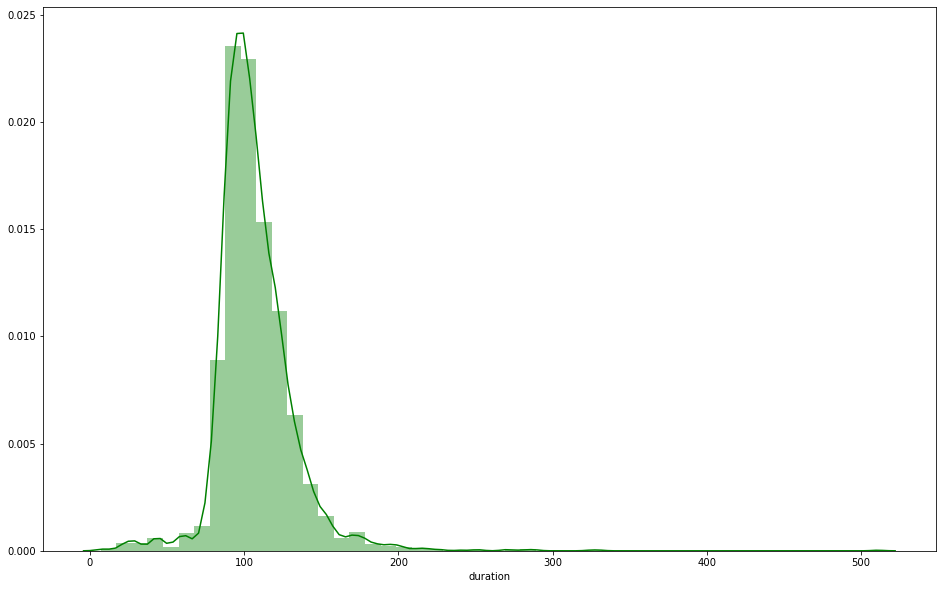

In [54]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['duration'],ax=ax,color='green')

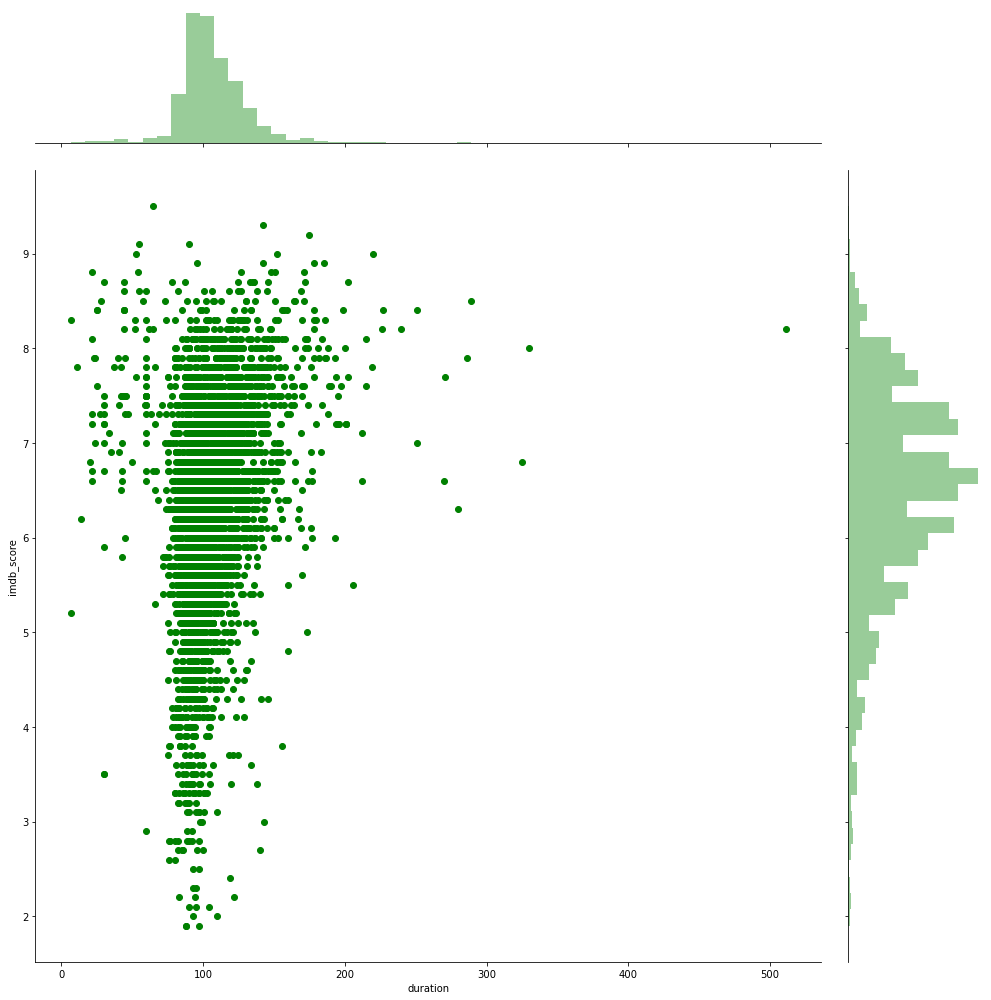

In [55]:
sns.jointplot(x='duration', y='imdb_score',height=14,kind='scatter', data=df,color='green')

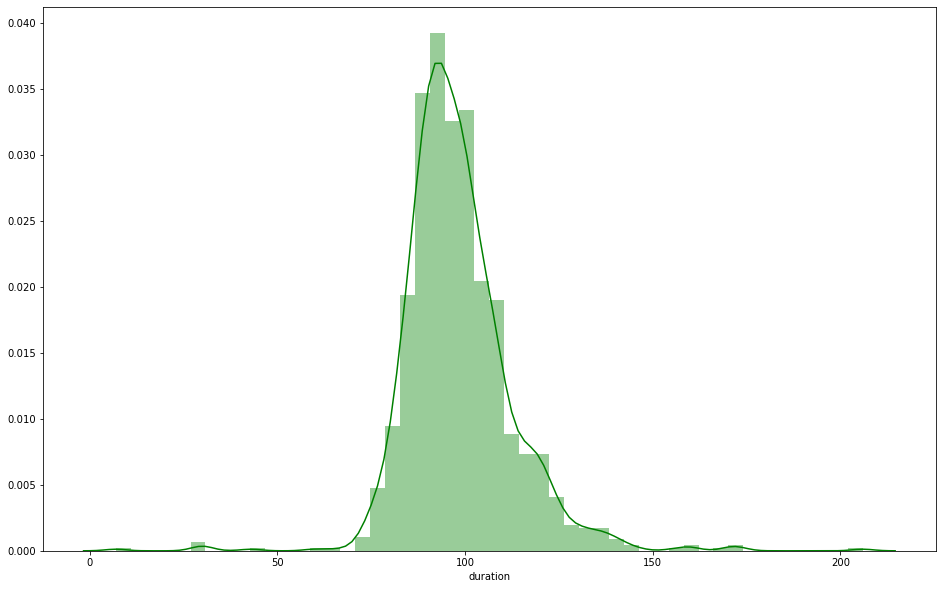

In [56]:
df_low6_imdb_score=df[df['imdb_score']<6]['duration']
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df_low6_imdb_score,ax=ax,color='green')

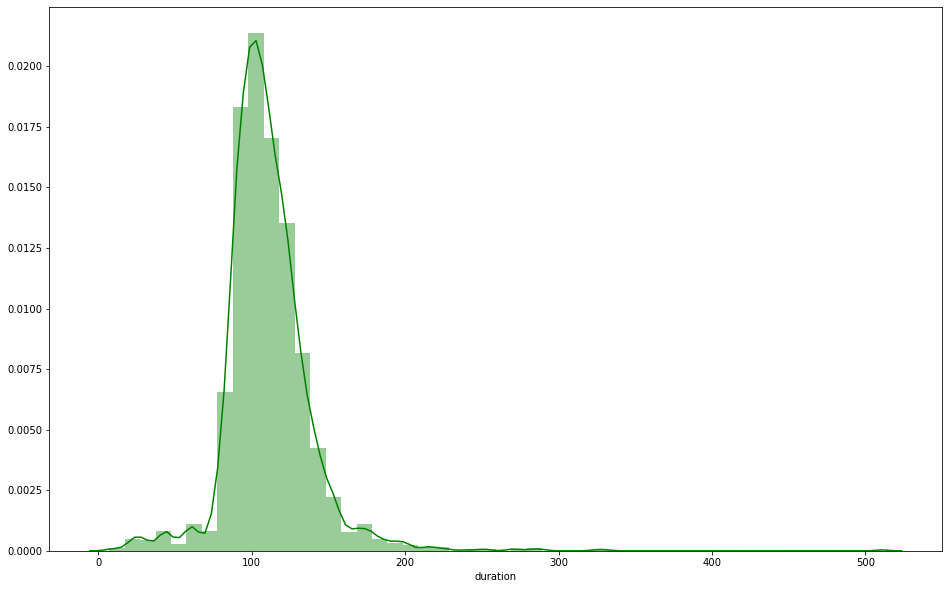

In [57]:
df_low6_imdb_score=df[df['imdb_score']>6]['duration']
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df_low6_imdb_score,ax=ax,color='green')

##### Insights
- Imdb score and duration both have normal distribution centered around 100
- Low imdb_score movies(less than 6) are concentrated around 100 mins #Leptokurtic(thinner tails thannormal distribution)

- **Data cleaning step**: There is null value,type=numeric
- **Feature engineering step**: Drop this feature as there is no general trend or experiment 

#### 'gross'

In [58]:
df['gross'].sort_values()

532    703.00      
240    721.00      
2136   728.00      
1728   828.00      
1933   1111.00     
3314   1521.00     
225    1711.00     
1946   2245.00     
3834   2436.00     
3593   2468.00     
3872   2843.00     
3375   2874.00     
2622   2964.00     
165    3330.00     
1159   3478.00     
2764   3607.00     
2445   4063.00     
204    4091.00     
2569   4556.00     
193    4756.00     
1369   4958.00     
1473   5005.00     
309    5199.00     
728    5494.00     
3363   5561.00     
3712   5725.00     
3653   5824.00     
3868   5858.00     
1055   6013.00     
3727   6387.00     
3167   6643.00     
3407   7680.00     
3209   7927.00     
422    8231.00     
3311   8691.00     
1130   9213.00     
2612   9910.00     
448    9950.00     
1385   10018.00    
154    10443.00    
3342   10696.00    
660    11278.00    
1898   11798.00    
88     11835.00    
4032   12438.00    
8      12561.00    
2142   12667.00    
535    12836.00    
2319   12996.00    
736    13134.00    


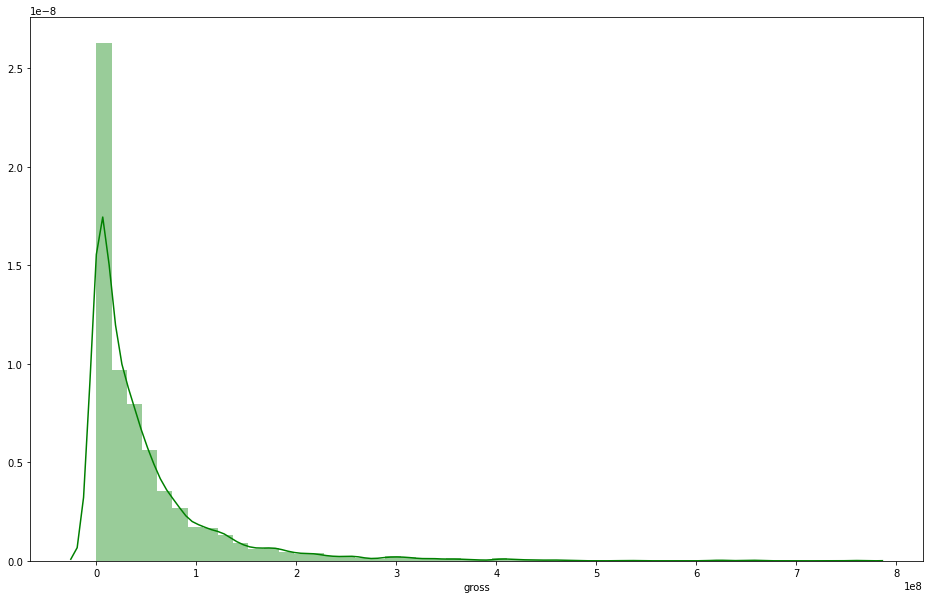

In [59]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['gross'],ax=ax,color='green')

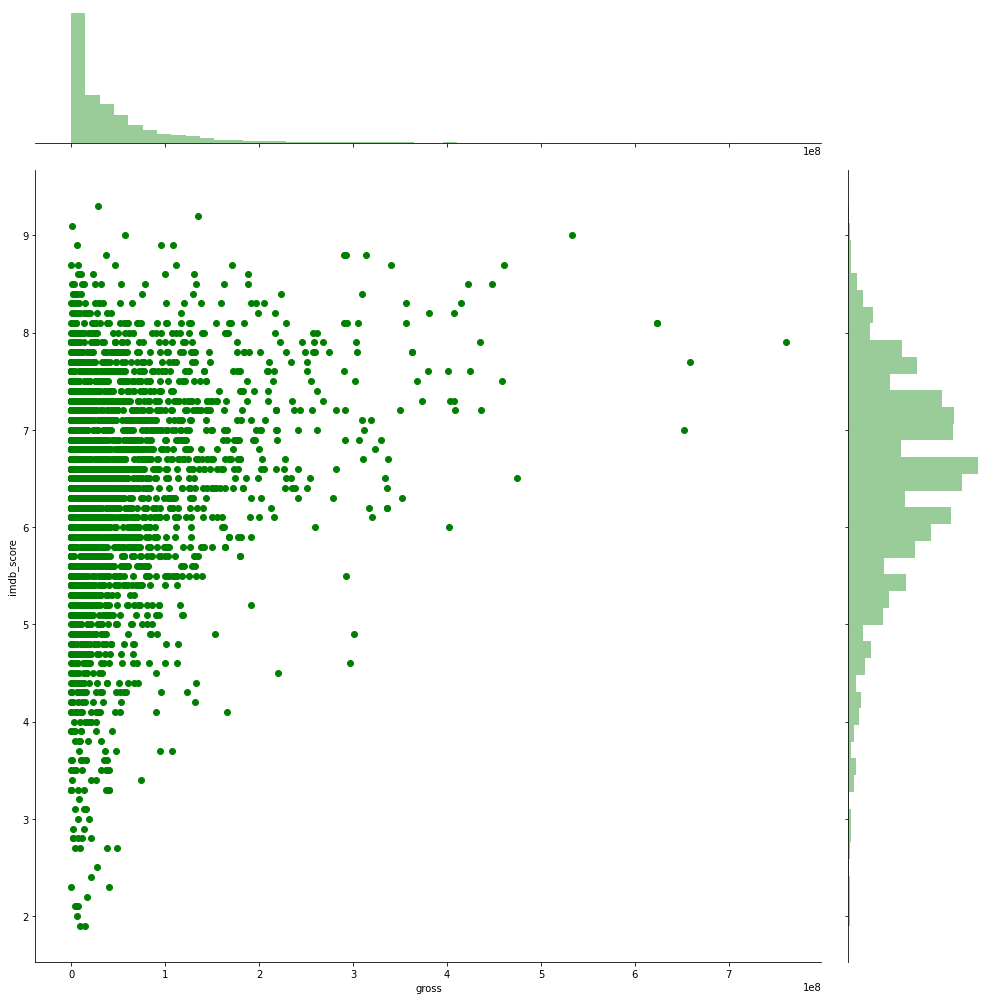

In [60]:
sns.jointplot(x='gross', y='imdb_score',height=14,kind='scatter', data=df,color='green')

In [61]:
df['gross'].mean()/(10000*10000)

0.4795553988832029

##### Insights
- Extremely high grossing movies generally have high imdb_score

- **Data cleaning step**: Gross can be replaced with budget, and remaining missing values can be replaced with  mean gross
- **Feature engineering step**: This seems to be an important factor, new feature [profit] can be created from this

#### 'facenumber_in_poster'

In [62]:
df['facenumber_in_poster'].value_counts()

0.00     1726
1.00     997 
2.00     577 
3.00     316 
4.00     159 
5.00     89  
6.00     54  
7.00     37  
8.00     30  
9.00     16  
10.00    6   
11.00    5   
15.00    5   
12.00    3   
13.00    2   
31.00    1   
19.00    1   
Name: facenumber_in_poster, dtype: int64

##### Insights
- Un-intutive to use this variable for modelling

- **Data cleaning step**: None
- **Feature engineering step**: Drop this variable from modelling

#### 'budget'

In [63]:
df.shape

(4034, 29)

In [64]:
sum(df['budget'].isnull())

394

In [65]:
df[df['budget']<np.mean(df['budget'])/10].shape,df[df['budget']<np.mean(df['budget'])*10].shape
#Imputation value for missing nan can be taken as mean

((695, 29), (3631, 29))

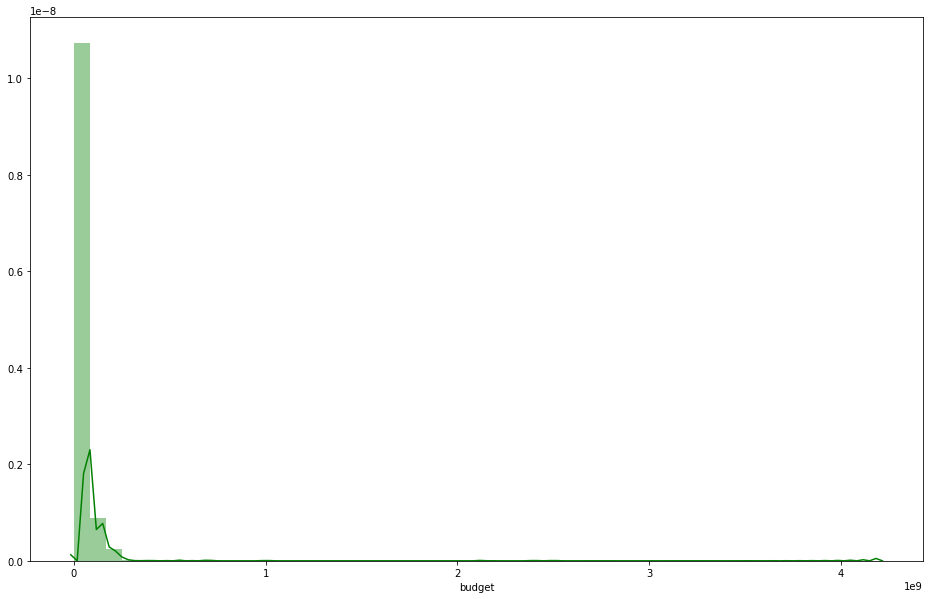

In [66]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(df['budget'],ax=ax,color='green')

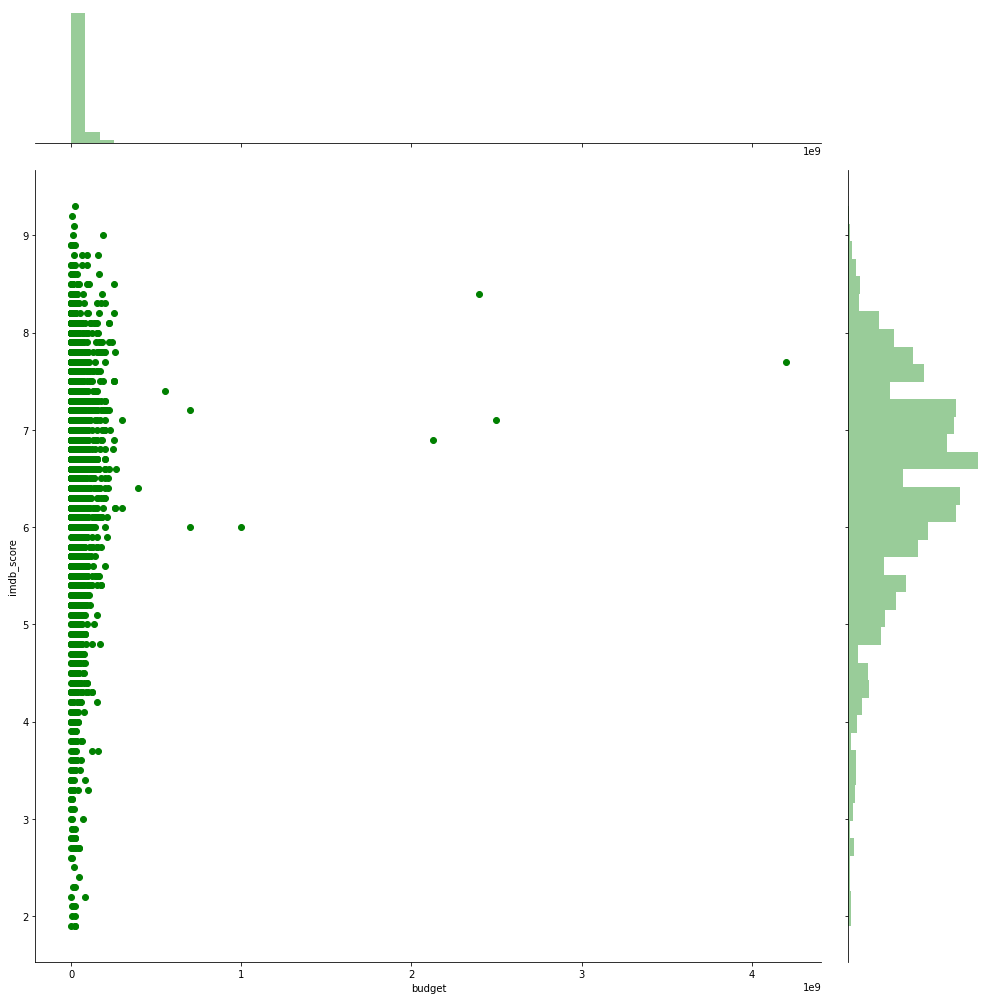

In [67]:
sns.jointplot(x='budget', y='imdb_score',height=14,kind='scatter', data=df,color='green')

##### Insights
- The right tail of the curve is very elongated and thin, this may be because of the outliers. 

- **Data cleaning step**: Remove outliers/ Put a ceiling on the maxing value
- **Feature engineering step**:Create profit feature

#### 'title_year'

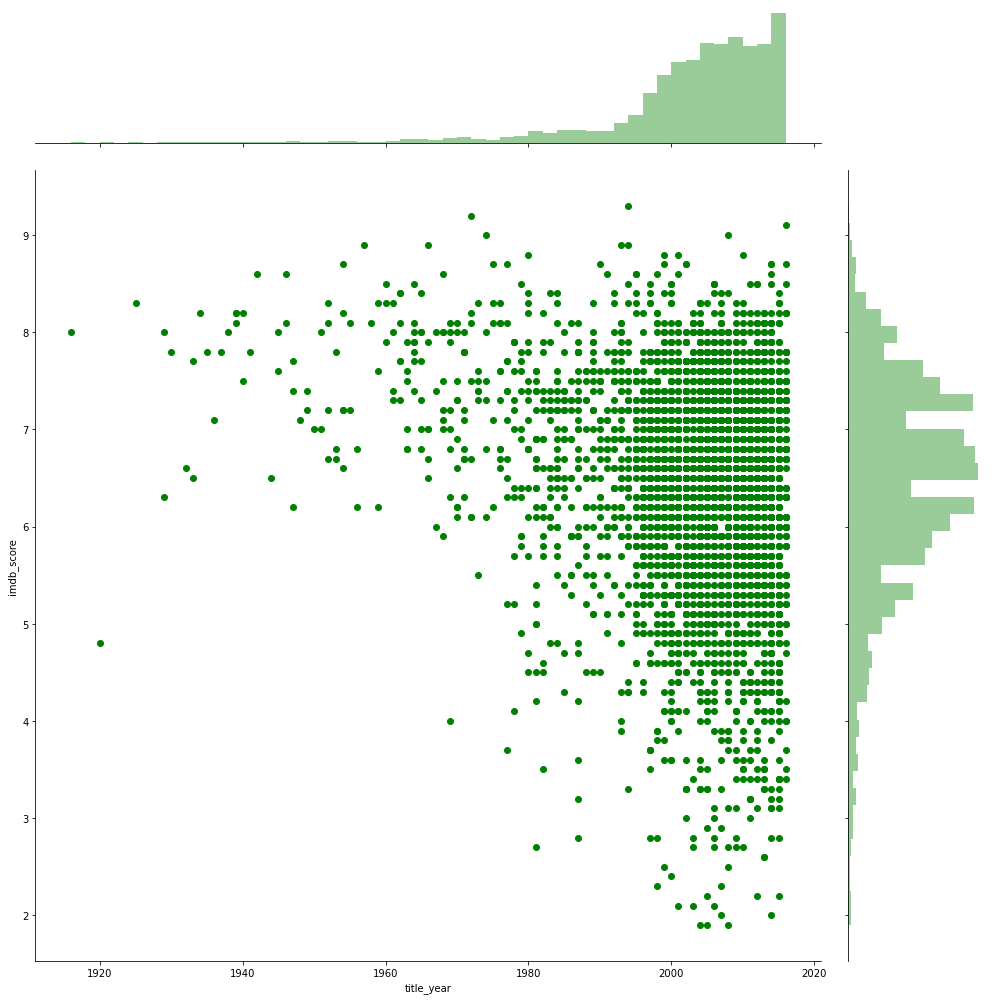

In [68]:
sns.jointplot(x='title_year', y='imdb_score',height=14,kind='scatter', data=df,color='green')

In [69]:
np.mean(df['title_year'])

2002.5679918966828

In [70]:
sum(df['title_year'].isna())

85

##### Insights
- Older movies (less than 1970)generally have rating greater than 5.
- Most of the movies are from last 3 decades.

- **Data cleaning step**: Remove outliers/ Put a ceiling on the maxing value
- **Feature engineering step**:For missing values, mean value of 2002 can be taken

In [71]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### 'director_facebook_likes'

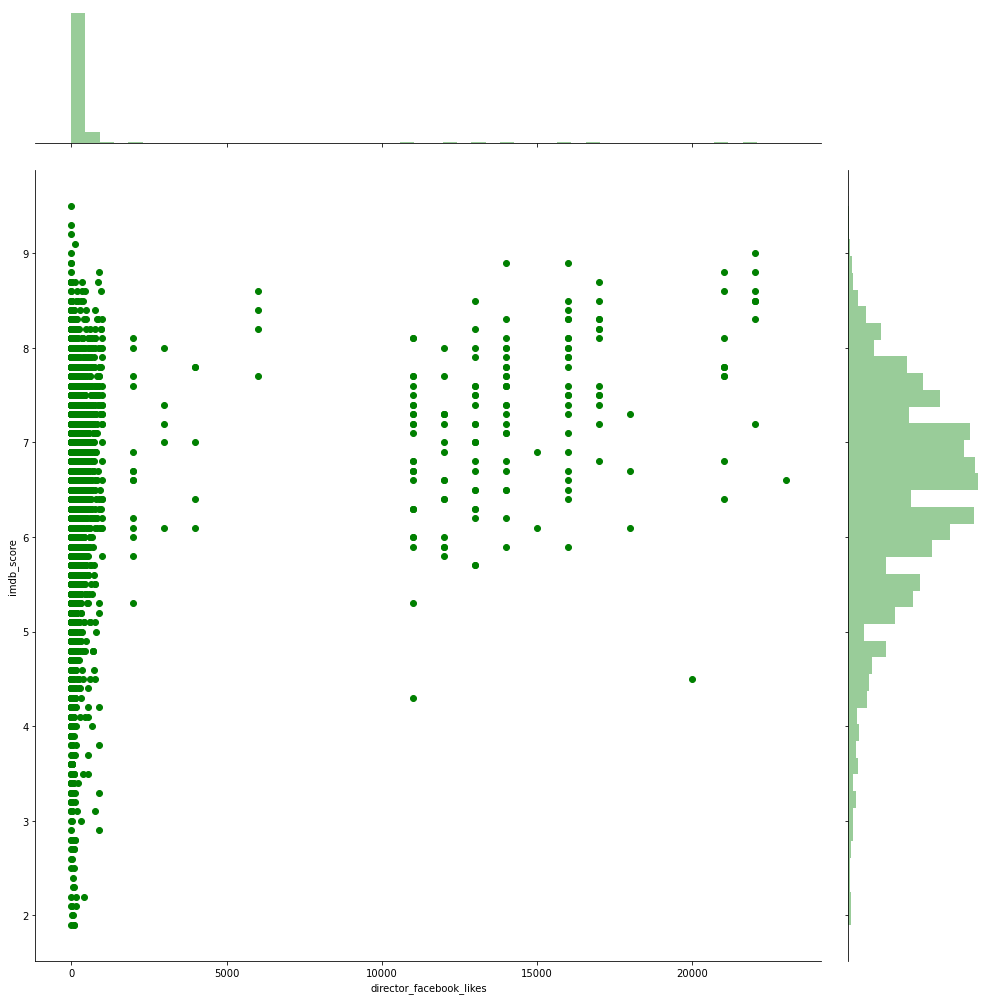

In [72]:
sns.jointplot(x='director_facebook_likes', y='imdb_score',height=14,kind='scatter', data=df,color='green')

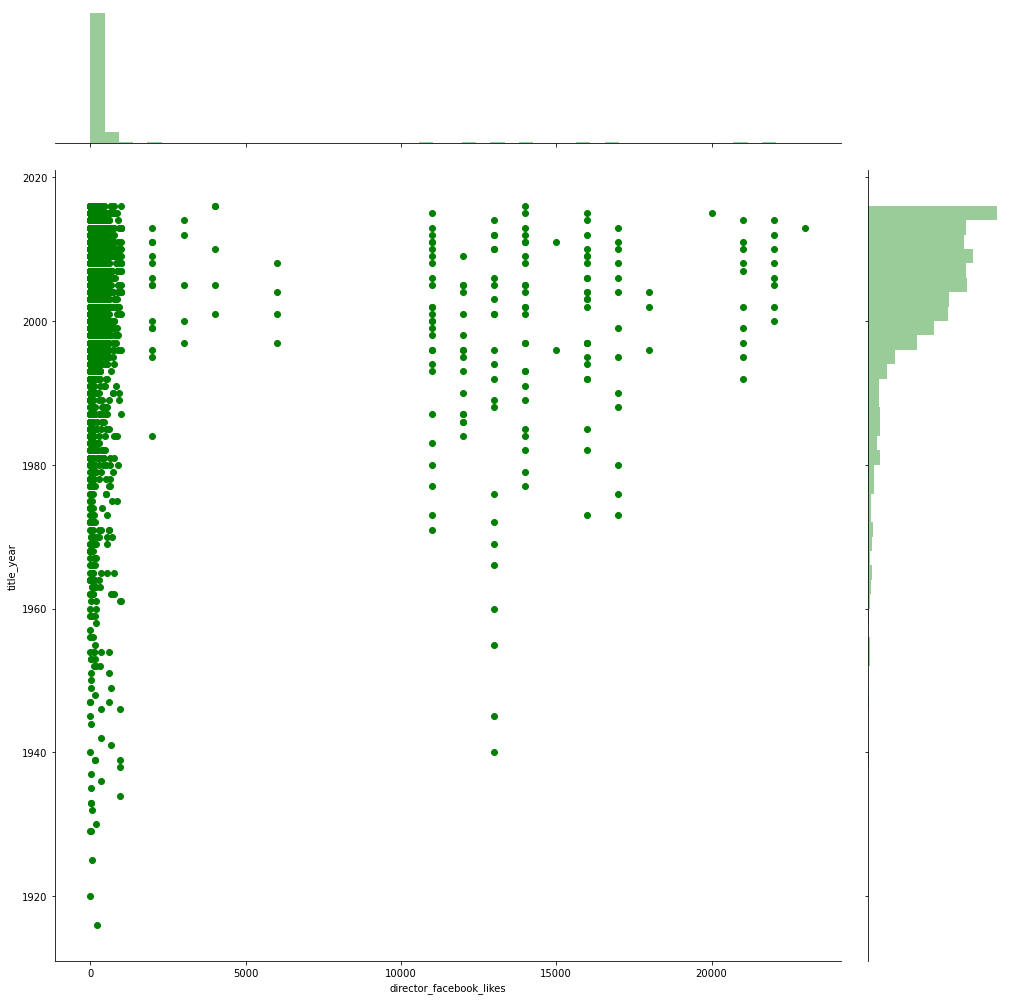

In [73]:
#title year vs likes
sns.jointplot(x='director_facebook_likes', y='title_year',height=14,kind='scatter', data=df,color='green')

In [74]:
np.mean(df['director_facebook_likes'])

716.3207690361751

In [75]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

##### Insights
- The distribution of data is not smooth, and it can be attributed to data authenticity/correctness
- Mean value of like is 716.32 , so the unit of likes may be in 100s or 1000s, again this data doesn't seems to be  correct.

- **Data cleaning step**: Replace value with mean
- **Feature engineering step**:This seems to a very important value intutively for imdb_score

#### 'num_critic_for_reviews'

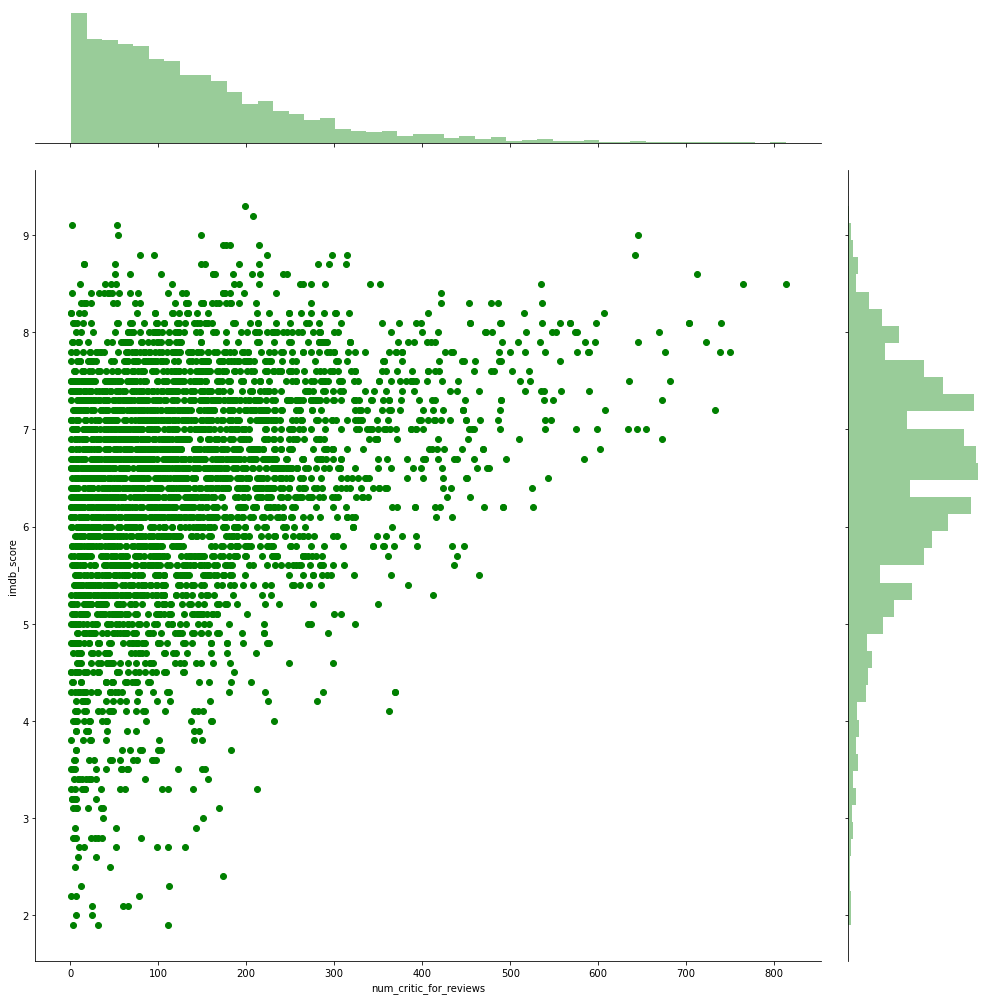

In [76]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score',height=14,kind='scatter', data=df,color='green')

##### Insights
- For high value(above 500) of 'num_critic_for_reviews', 'imdb_score' is greater than 6.


- **Data cleaning step**: Replace value with mean
- **Feature engineering step**:-This seems to a important value  for imdb_score


### (3) Modelling
- #### Data pre-processing
- The functions are created here:
    1. fill_missing_data : 
    2. transform_data 
    3. add_new_feature_to_data
    4. remove_non_intutive_feature(+ non-transformed string features)
    5. remove_correlated_feature

####  3.1 Fill missing data
- Here we will impute for missing value across all features

In [77]:
try:
    df.drop('index',inplace=True,axis=1)
except LookupError:
    print ("Index column is not present in datarame")
else:
    pass

##### Not many rows with too many nan values so no need to drop rows

In [78]:
df[df.isnull().sum(axis=1) < 10].shape,df.shape

((4034, 28), (4034, 28))

#### Approch for filling null values

In [79]:
list(df_percent_null[df_percent_null['percent_null']!=0]['column_name'])

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio']

| Approach      | Features |
| ----------- | ----------- |
| Imputation with mean      | 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',      |
| Custom approch  (using replace_with_budget function) | 'gross'  |
|MICE|'budget'|
| Not considering as it will be dropped later|'aspect_ratio','facenumber_in_poster'|

In [80]:
def replace_with_budget(row,mean_gross,adjusted_mean_profit_percent):
    if(pd.isna(row['gross'])):
        if(not pd.isna(row['budget'])):
            return row['budget']*(1+adjusted_mean_profit_percent)
    else:
        return mean_gross
    
    
#On an average a company makes 367% times the budget
mean_profit_percentage=np.mean((df['gross']-df['budget'])/df['budget'])
print('mean_profit_percentage: ',mean_profit_percentage)
adjusted_mean_profit_percent=mean_profit_percentage/2
print('adjusted_mean_profit_percent: ',adjusted_mean_profit_percent)

mean_profit_percentage:  3.6704769257910654
adjusted_mean_profit_percent:  1.8352384628955327


In [81]:
mean_imputation_list=['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes']
addition_information_required={   }
for col in mean_imputation_list:
    addition_information_required['mean_'+col]=np.mean(df[col])
addition_information_required['mean_gross']=np.mean(df['gross'])
addition_information_required['adjusted_mean_profit_percent']=adjusted_mean_profit_percent
addition_information_required['mean_df_train_budget']=np.mean(df['budget'])

In [82]:
# Data cleaning from above observations:
# Here we will impute all the missing data
# Data transformation: categorical to numerical will be done later
def data_cleaning(df,addition_information_required):
    #color
    df['color']=df['color'].replace({'nan':'color'})

    #language
    df['language']=df['language'].apply(lambda x: x if x=='english' else 'non_english')
    df['gross']=df.apply(lambda x: replace_with_budget(x,addition_information_required['mean_gross'],addition_information_required['adjusted_mean_profit_percent']),axis=1)
    
    for col in mean_imputation_list:
        df[col].fillna(np.mean(df[col]))
    
    ## Using MICE:
    #!pip install fancyimpute 
    #Unable to install mice related libraries
    
    df['budget']=addition_information_required['mean_df_train_budget']
    return df

In [83]:
df=data_cleaning(df,addition_information_required)

In [84]:
df_unseen=data_cleaning(df_unseen,addition_information_required)

<ipython-input-82-ede7db3b9630>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=df['color'].replace({'nan':'color'})
<ipython-input-82-ede7db3b9630>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language']=df['language'].apply(lambda x: x if x=='english' else 'non_english')
<ipython-input-82-ede7db3b9630>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [85]:
df.isnull().sum()

color                        0  
director_name                0  
num_critic_for_reviews       42 
duration                     14 
director_facebook_likes      81 
actor_3_facebook_likes       21 
actor_2_name                 0  
actor_1_facebook_likes       7  
gross                        179
genres                       0  
actor_1_name                 0  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 0  
facenumber_in_poster         10 
plot_keywords                0  
movie_imdb_link              0  
num_user_for_reviews         20 
language                     0  
country                      0  
content_rating               0  
budget                       0  
title_year                   85 
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 267
movie_facebook_likes         0  
dtype: int64

In [86]:
df_unseen.isnull().sum()

color                        0 
director_name                0 
num_critic_for_reviews       8 
duration                     1 
director_facebook_likes      23
actor_3_facebook_likes       2 
actor_2_name                 0 
actor_1_facebook_likes       0 
gross                        45
genres                       0 
actor_1_name                 0 
movie_title                  0 
num_voted_users              0 
cast_total_facebook_likes    0 
actor_3_name                 0 
facenumber_in_poster         3 
plot_keywords                0 
movie_imdb_link              0 
num_user_for_reviews         1 
language                     0 
country                      0 
content_rating               0 
budget                       0 
title_year                   23
actor_2_facebook_likes       0 
imdb_score                   0 
aspect_ratio                 62
movie_facebook_likes         0 
dtype: int64

#### 3.2 transform_data

In [87]:
sorted(obj_columns)

['actor_1_name',
 'actor_2_name',
 'actor_3_name',
 'color',
 'content_rating',
 'country',
 'director_name',
 'genres',
 'language',
 'movie_imdb_link',
 'movie_title',
 'plot_keywords']

#### Variables consdered for transform_data (categorical_data)
1. 'color': One hot encoding 
2. 'content_rating'
    #Lets create few categorical column
    1. pg Parental guide pg/pg-13/tv-pg
    2. g general g/tv-g
    3. R 
    4. Others
3. 'actor_1_name','actor_2_name','actor_2_name':
    Later
4. 'language': One hot encoding of english and non-english
5. 'director_name'
    Later
6. 'country': One hot encoding {'us' or non_us}
7. 'genres':
    1. top_5_genres (5 columns)
8. 'movie_imdb_link':Will be dropped
9.  'movie_title': Will be dropped
10. 'plot_keywords':Will be dropped

In [88]:
def transform_data(df):
    #color
    df['color']=df['color'].apply(lambda x:1 if x=='color' else 0)
    #Add content_rating related columns
    replace_dict_content_rating={
        'r':'content_rating_r',
        'pg-13':'content_rating_pg',
        'pg':'content_rating_pg',
        'nan':'content_rating_other',
        'g':'content_rating_g',
        'not rated':'content_rating_other',
        'unrated':'content_rating_other',
        'approved':'content_rating_other',
        'tv-14':'content_rating_other',
        'tv-ma':'content_rating_other',
        'x':'content_rating_other',
        'tv-pg':'content_rating_pg',
        'tv-g':'content_rating_g',
        'passed':'content_rating_other',
        'nc-17':'content_rating_other',
        'gp':'content_rating_other',
        'm':'content_rating_other',
        'tv-y':'content_rating_other',
        'tv-y7':'content_rating_other',
    }
    df['content_rating']=df['content_rating'].replace(replace_dict_content_rating)
    df=pd.concat([df, pd.get_dummies(df['content_rating'],  dummy_na=False,)],axis=1)
    #language
    df['language']=df['language'].apply(lambda x :1 if x=='english' else 0)
    #'country'
    df['country']=df['country'].apply(lambda x: 1 if x=='usa' else 0)
    #Add top 5 genres: See insights earlier ['']
    top_5_genre=['drama','comedy']
    
    for genre in top_5_genre:
        df['genre_'+genre]=df['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)
    
    df.drop(['movie_imdb_link','movie_title','plot_keywords','content_rating'],axis=1,inplace=True)
    return df

In [89]:
df['color'].value_counts().reset_index()

index  color
0  color             3873 
1   black and white  161

In [90]:
df=transform_data(df)
df_unseen=transform_data(df_unseen)

<ipython-input-88-2a58a83f5fac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=df['color'].apply(lambda x:1 if x=='color' else 0)
<ipython-input-88-2a58a83f5fac>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_rating']=df['content_rating'].replace(replace_dict_content_rating)


#### Feature engineering
- 1. Additional feature creation- which represent information in better format
- 2. Removing nonintutive features
- 3. Feature elimination

#### 3.1 Creating new features

In [91]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'content_rating_g',
       'content_rating_other', 'content_rating_pg', 'content_rating_r',
       'genre_drama', 'genre_comedy'],
      dtype='object')

##### On the basis of above analysis we will add the following features
- 1. Profit
- 2. 'actor_1_name','actor_2_name','actor_2_name':
    1. name in top_50_actor_1/2/3 by frequency list
- 3. 'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'
    1. Popular_50_actor
    2. Total likes ('actor_1_facebook_likes'+'actor_2_facebook_likes'+'actor_3_facebook_likes')
- 3. 'director_name'
    1. Frequency_director(top 30)
- 4. 'director_facebook_likes' 
    1. Popular_30_director

In [92]:
## Utility/helper functions

def popular_actor_likes_cutoff_fn(df):
    #Most popular actor top 30 by number of movies
    df_actor_1=df[['actor_1_name','actor_1_facebook_likes']].rename(columns={'actor_1_name':'actor_name','actor_1_facebook_likes':'actor_facebook_likes'})
    df_actor_2=df[['actor_2_name','actor_2_facebook_likes']].rename(columns={'actor_2_name':'actor_name','actor_2_facebook_likes':'actor_facebook_likes'})
    df_actor_3=df[['actor_3_name','actor_3_facebook_likes']].rename(columns={'actor_3_name':'actor_name','actor_3_facebook_likes':'actor_facebook_likes'})
    df_actor_temp=df_actor_1.append(df_actor_2).append(df_actor_3)
    df_actor_temp=df_actor_temp.drop_duplicates()

    top_70_likes=[val for val in sorted(df_actor_temp['actor_facebook_likes'],reverse=True)[:71] if val !='nan']
#     print(top_70_likes)
    #Let's set the cutoff at 12000
    return 12000

def popular_director_likes_cutoff_fn(df):
    df_dir_temp=df[['director_name','director_facebook_likes']]
    df_dir_temp=df_dir_temp.drop_duplicates()
    top_30_likes=[col for col in sorted(df_dir_temp['director_facebook_likes'],reverse=True)[:31]if col!='nan']
    #Lets set the cutoff at 400
#     print(top_30_likes)
    return 187

def top_frequent_50_actor_fn(df):
    #Most frequent actor top 50 by number of movies
    all_actor_list=df['actor_1_name'].append(df['actor_2_name']).append(df['actor_3_name'])
    frequent_50_actor_list=[col for col in all_actor_list.value_counts().nlargest(51).index if col!='nan']# Also removing 'nan'
    return frequent_50_actor_list 

def top_frequent_50_director_fn(df_series_director_name):
    frequent_50_director_list=[col for col in df_series_director_name.value_counts().nlargest(51).index if col!='nan']
    return frequent_50_director_list

In [93]:
top_frequent_50_actor=top_frequent_50_actor_fn(df[['actor_1_name','actor_2_name','actor_3_name']])
top_frequent_50_director=top_frequent_50_director_fn(df['director_name'])

popular_actor_likes_cutoff=popular_actor_likes_cutoff_fn(df)
popular_director_likes_cutoff=popular_director_likes_cutoff_fn(df)

dict_n_actor_dir={
    'top_frequent_50_actor':top_frequent_50_actor,
    'popular_actor_likes_cutoff':popular_actor_likes_cutoff,
    
    'top_frequent_50_director':top_frequent_50_director,
    'popular_director_likes_cutoff':popular_director_likes_cutoff

}

In [94]:
# Actual/main functions used in apply
def check_top_frequent_actor(row,top_frequent_50_actor):
#     print(row)
    cast_names=[row['actor_1_name'],row['actor_2_name'],row['actor_3_name']]
    common_names=[actor_name for actor_name in cast_names if actor_name in top_frequent_50_actor]
    if(len(common_names)>1):
        return 1
    else:
        return 0
def check_top_frequent_director(row,top_frequent_50_director):
    if(row['director_name'] in top_frequent_50_director):
        return 1
    else:
        return 0
    
def check_popular_actor(row,popular_actor_likes_cutoff):
    if(max(row['actor_1_facebook_likes'],row['actor_2_facebook_likes'],row['actor_3_facebook_likes'])>=popular_actor_likes_cutoff):
        return 1
    else:
        return 0

def check_popular_director(row,popular_director_likes_cutoff):
    if(row['director_facebook_likes']>=popular_director_likes_cutoff):
        return 1
    else:
        return 0

In [95]:
def add_new_feature_to_data(df,dict_n_actor_dir):
    df['profit']=df['gross']-df['budget']
    df['frequent_actor']=df.apply(lambda x:check_top_frequent_actor(x,dict_n_actor_dir['top_frequent_50_actor']),axis=1 )#Boolean feature if s/he is in popular actors/ess
    df['frequent_director']=df.apply(lambda x: check_top_frequent_director(x,dict_n_actor_dir['top_frequent_50_director']),axis=1)#Boolean feature if s/he is in top director
    
    df['popular_actor']=df.apply(lambda x: check_popular_actor(x,dict_n_actor_dir['popular_actor_likes_cutoff']),axis=1)#Boolean feature if s/he is in top actors/ess
    df['popular_director']=df.apply(lambda x:check_popular_director(x,dict_n_actor_dir['popular_director_likes_cutoff']),axis=1)#Boolean feature if s/he is in top director
    df['total_actor_likes']=df['actor_1_facebook_likes']+df['actor_2_facebook_likes']+df['actor_3_facebook_likes']
    return df

In [96]:
df=add_new_feature_to_data(df,dict_n_actor_dir)
df_unseen=add_new_feature_to_data(df_unseen,dict_n_actor_dir)

In [97]:
df.head()

color     director_name  num_critic_for_reviews  duration  \
0  1      oliver stone     242.00                  129.00      
1  1      denis villeneuve 226.00                  139.00      
2  1      ron howard       185.00                  111.00      
3  1      alexander payne  549.00                  115.00      
4  1      harold becker    79.00                   111.00      

   director_facebook_likes  actor_3_facebook_likes               actor_2_name  \
0 0.00                     655.00                   scott glenn                 
1 777.00                   58.00                    mélissa désormeaux-poulin   
2 2000.00                  244.00                   clint howard                
3 729.00                   552.00                   nick krause                 
4 17.00                    652.00                   miko hughes                 

   actor_1_facebook_likes       gross                       genres  \
0 2000.00                 47955539.89  biography|drama|history       
1 131.00                  47955539.89  drama|mystery|war             
2 17000.00                47955539.89  comedy|drama                  
3 8000.00                 47955539.89  comedy|drama                  
4 13000.00                47955539.89  action|crime|drama|thriller   

       actor_1_name  num_voted_users  cast_total_facebook_likes  \
0  toby jones        40941            4264                        
1  lubna azabal      80429            343                         
2  channing tatum    43709            18510                       
3  shailene woodley  205284           9578                        
4  bruce willis      54314            16536                       

     actor_3_name  facenumber_in_poster  num_user_for_reviews  language  \
0  bruce mcgill   1.00                  320.00                 1          
1  ahmad massad   0.00                  156.00                 0          
2  chelcie ross   2.00                  141.00                 1          
3  beau bridges   0.00                  439.00                 1          
4  carrie preston 1.00                  127.00                 1          

   country      budget  title_year  actor_2_facebook_likes  imdb_score  \
0  1       36987281.54 2008.00     826.00                  6.40          
1  0       36987281.54 2010.00     66.00                   8.20          
2  1       36987281.54 2011.00     1000.00                 5.30          
3  1       36987281.54 2011.00     727.00                  7.30          
4  1       36987281.54 1998.00     968.00                  6.10          

   aspect_ratio  movie_facebook_likes  content_rating_g  content_rating_other  \
0 2.35           0                     0                 0                      
1 1.85           37000                 0                 0                      
2 2.35           0                     0                 0                      
3 2.35           22000                 0                 0                      
4 2.35           0                     0                 0                      

   content_rating_pg  content_rating_r  genre_drama  genre_comedy      profit  \
0  1                  0                 1            0            10968258.35   
1  0                  1                 1            0            10968258.35   
2  1                  0                 1            1            10968258.35   
3  0                  1                 1            1            10968258.35   
4  0                  1                 1            0            10968258.35   

   frequent_actor  frequent_director  popular_actor  popular_director  \
0  0               1                  0              0                  
1  0               0                  0              1                  
2  0               1                  1              1                  
3  0               0                  0              1                  
4  0               0                  1              0                  

##### 3.1.3 Dropping feature based on multi-collinearity

#### 3.1 Feature elimination
1. Dropping non-intutive features/textual features
2. Dropping features based on correlation
3. Dropping due to other reasons

In [98]:
# correlation
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrmat.unstack().sort_values(ascending=False)
df_corr=pd.DataFrame(sorted_mat).reset_index()
df_corr.columns=['feature_1','feature_2','correlation']
df_corr['abs_corr']=df_corr['correlation'].apply(lambda x:abs(x))
df_corr=df_corr[df_corr['abs_corr']!=1]
df_corr.sort_values('abs_corr',ascending=False)[:20]

feature_1                  feature_2  correlation  \
17  cast_total_facebook_likes  actor_1_facebook_likes    0.95           
18  actor_1_facebook_likes     cast_total_facebook_likes 0.95           
19  num_voted_users            num_user_for_reviews      0.80           
20  num_user_for_reviews       num_voted_users           0.80           
21  movie_facebook_likes       num_critic_for_reviews    0.68           
22  num_critic_for_reviews     movie_facebook_likes      0.68           
23  num_critic_for_reviews     num_voted_users           0.63           
24  num_voted_users            num_critic_for_reviews    0.63           
25  gross                      num_voted_users           0.63           
26  num_voted_users            gross                     0.63           
28  num_critic_for_reviews     num_user_for_reviews      0.61           
27  num_user_for_reviews       num_critic_for_reviews    0.61           
29  actor_2_facebook_likes     cast_total_facebook_likes 0.60           
30  cast_total_facebook_likes  actor_2_facebook_likes    0.60           
31  gross                      num_user_for_reviews      0.56           
32  num_user_for_reviews       gross                     0.56           
33  actor_2_facebook_likes     actor_3_facebook_likes    0.55           
34  actor_3_facebook_likes     actor_2_facebook_likes    0.55           
35  num_voted_users            movie_facebook_likes      0.55           
36  movie_facebook_likes       num_voted_users           0.55           

    abs_corr  
17 0.95       
18 0.95       
19 0.80       
20 0.80       
21 0.68       
22 0.68       
23 0.63       
24 0.63       
25 0.63       
26 0.63       
28 0.61       
27 0.61       
29 0.60       
30 0.60       
31 0.56       
32 0.56       
33 0.55       
34 0.55       
35 0.55       
36 0.55

In [99]:
# removing features code is executed in the 'imdb_score_prediction_modelling_and_conclusion' notebook

In [100]:
# def remove_feature(df): # Also removes string features
#     #Non-intutive features
#     df.drop(['aspect_ratio','facenumber_in_poster'],axis=1,inplace=True)
#     #Textual features
#     df.drop(['director_name','actor_1_name','actor_2_name','actor_3_name','genres'],axis=1,inplace=True)
#     #Highly corelated features (Removing 1 from a pair)
#     df.drop(['actor_1_facebook_likes','num_voted_users','num_critic_for_reviews'],axis=1,inplace=True)
#     #other ways
#     #df.drop([''],axis=1,inplace=True)
    
#     return df
# df=remove_feature(df)
# df_unseen=remove_feature(df_unseen)

#### Saving cleaned data

In [101]:
output_folder_path

'C:/Users/91967/Desktop/machine_learning_projects/imdb_score_prediction_razorpay/output_files'

In [102]:
print(output_folder_path)
df.to_csv(output_folder_path+'/imdb_train_data.csv',index=False)
df_unseen.to_csv(output_folder_path+'/imdb_test_data.csv',index=False)

C:/Users/91967/Desktop/machine_learning_projects/imdb_score_prediction_razorpay/output_files
